In [1]:
import pandas as pd
import numpy as np
import codecs
from sklearn.feature_extraction import DictVectorizer as DV
from sklearn.preprocessing import StandardScaler
from sklearn import ensemble, cross_validation, tree, metrics, linear_model, neighbors
from sklearn.grid_search import GridSearchCV
from pybrain.datasets import ClassificationDataSet
from pybrain.tools.shortcuts import buildNetwork
from pybrain.supervised.trainers import BackpropTrainer
from pybrain.structure.modules import SigmoidLayer
from pybrain.structure.modules import SoftmaxLayer
from pybrain.utilities import percentError
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel as SFM

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data=pd.read_csv("credit_train.csv", ";")
# Чистим тестовые данные
data_test=pd.read_csv("credit_test.csv", ";")

data.open_account_flg=data.open_account_flg.apply(lambda x: float(x))
y_train=data.open_account_flg.values

In [4]:
data_test['open_account_flg']=0.

In [5]:
data=data.append(data_test, ignore_index=True)

In [6]:
#Замена запятых на точки
data.credit_sum=data.credit_sum.apply(lambda x: float(x.replace(",",".")))
data.score_shk=data.score_shk.apply(lambda x: float(x.replace(",",".")))

In [7]:
#Замена точек на запятые
data.tariff_id=data.tariff_id.apply(lambda x: str(x))
data.tariff_id=data.tariff_id.apply(lambda x: x.replace(".",","))

In [8]:
data.living_region=data.living_region.apply(lambda x: str(x))

In [9]:
data.living_region=data.living_region.apply(lambda x: x.replace(" \xca\xd0\xc0\xc9","")) # _Край
data.living_region=data.living_region.apply(lambda x: x.replace(" \xce\xc1\xcb\xc0\xd1\xd2\xdc","")) # _Область
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xce\xc1\xcb","")) # _АОБЛ
data.living_region=data.living_region.apply(lambda x: x.replace("\xc0\xce\xc1\xcb ","")) # АОБЛ_
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xc1\xcb. ","")) # Обл._
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xc1\xcb.","")) # Обл.
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xc1\xcb ","")) # Обл_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xce\xc1\xcb","")) # _Обл
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9. ","")) # Край._
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9.","")) # Край.
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9 ","")) # Край_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 -","")) # _Республика -
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 ","")) # Республика_
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # Республика
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # _Республика
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf. ","")) # Респ._
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf.","")) # Респ.
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf ","")) # Респ_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf","")) # _Респ
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xce","")) # _АО
data.living_region=data.living_region.apply(lambda x: x.replace("\xc0\xce ","")) # АО_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0O","")) # _АО
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde\xc3\xd0\xc0","")) # _АВТОНОМНЫЙ ОКРУГ - ЮГРА
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde","")) # _АВТОНОМНЫЙ ОКРУГ - Ю
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3.\xce\xc4\xc8\xcd\xd6\xce\xc2\xce ","")) # Г.Одинцво_
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3. ","")) # Г._
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3.","")) # Г.
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3 ","")) # Г_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc3","")) # _Г
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xc0\xdf","")) # _Автономная
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc0\xdf","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # Камчатская на Камчатский
data.living_region=data.living_region.apply(lambda x: x.replace("\xcf\xc5\xd0\xcc\xd1\xca\xc0\xdf","\xcf\xc5\xd0\xcc\xd1\xca\xc8\xc9")) # Пермская на Пермский
data.living_region=data.living_region.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xc2\xce\xd1\xca\xc0\xdf","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # МОСКВОСКАЯ на Московская
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xd0\xa8\xcb","\xce\xd0\xcb\xce\xc2\xd1\xca\xc0\xdf")) # Орел на Орловская
data.living_region=data.living_region.apply(lambda x: x.replace(" (\xdf\xca\xd3\xd2\xc8\xdf)","")) # _(Якутия)
data.living_region=data.living_region.apply(lambda x: x.replace(" /\xdf\xca\xd3\xd2\xc8\xdf/","")) # _(Якутия)
data.living_region=data.living_region.apply(lambda x: x.replace("\xd1\xc5\xc2. ","")) # Сев._
data.living_region=data.living_region.apply(lambda x: x.replace("\xd1\xc5\xc2\xc5\xd0\xcd\xc0\xdf ","")) # Северная_
data.living_region=data.living_region.apply(lambda x: x.replace(" - \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _- Чувашия
data.living_region=data.living_region.apply(lambda x: x.replace("\xd7\xd3\xc2\xc0\xd8\xc8\xdf ","")) # Чувашия_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _Чувашия
data.living_region=data.living_region.apply(lambda x: x.replace("\xc1\xd0\xdf\xcd\xd1\xca\xc8\xc9","\xc1\xd0\xdf\xcd\xd1\xca\xc0\xdf")) # Брянский на Брянская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3\xce\xd0\xdc\xca\xce\xc2\xd1\xca\xc0\xdf","\xcd\xc8\xc6\xc5\xc3\xce\xd0\xce\xc4\xd1\xca\xc0\xdf")) # Горьковская на Нижегородская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3\xd3\xd1\xdc-\xd5\xd0\xd3\xd1\xd2\xc0\xcb\xdc\xcd\xdb\xc9 \xd0-\xcd","\xc2\xcb\xc0\xc4\xc8\xcc\xc8\xd0\xd1\xca\xc0\xdf")) # Гусь-Хрустальный р-н на Владимировская
data.living_region=data.living_region.apply(lambda x: x.replace("\xcc\xdb\xd2\xc8\xd9\xc8\xcd\xd1\xca\xc8\xc9 \xd0-\xcd","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # Мытищинский р-н на Московская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc4\xc0\xcb\xdc\xcd\xc8\xc9 \xc2\xce\xd1\xd2\xce\xca","\xd0\xce\xd1\xd1\xc8\xdf")) # Дальний Восток на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("\xcf\xd0\xc8\xc2\xce\xcb\xc6\xd1\xca\xc8\xc9 \xd4\xc5\xc4\xc5\xd0\xc0\xcb\xdc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3","\xd0\xce\xd1\xd1\xc8\xdf")) # Приволжский Федеральный округ на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("74","\xd0\xce\xd1\xd1\xc8\xdf")) # 74 на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("98","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
data.living_region=data.living_region.apply(lambda x: x.replace(" ","")) # лишние пробелы
data.living_region=data.living_region.apply(lambda x: x.replace("nan","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("\xd7\xc8\xd2\xc8\xcd\xd1\xca\xc0\xdf","\xc7\xc0\xc1\xc0\xc9\xca\xc0\xcb\xdc\xd1\xca\xc8\xc9")) # Читинская на Забайкальский
data.living_region=data.living_region.apply(lambda x: x.replace("\xdd\xc2\xc5\xcd\xca\xc8\xc9\xd1\xca\xc8\xc9","\xca\xd0\xc0\xd1\xcd\xce\xdf\xd0\xd1\xca\xc8\xc9")) # Эвенкийский на Красноярский

data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1??\xc8\xc9","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # КАМЧАТС??ИЙ на Камчатский
data.living_region=data.living_region.apply(lambda x: x.replace("-\xde\xc3\xd0\xc0","")) # -Югра
data.living_region=data.living_region.apply(lambda x: x.replace("\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca","\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca\xc0\xdf")) # Челябинск на Челябинская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc0\xdf\xc0\xdf","\xc0\xdf")) # аяая на ая
data.living_region=data.living_region.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc8\xc9\xcf","\xd0\xce\xd1\xd1\xc8\xdf")) # МосковскийП на Россия

In [10]:
data.living_region=data.living_region.apply(lambda x: codecs.decode(x, "Windows-1251"))

In [11]:
# Заполняем пропуски в monthly_income
q=data[data.monthly_income.isnull()]
w=data[['gender', 'age', 'marital_status', 'job_position','education','living_region','monthly_income']]
w.drop(q.index.values, axis=0, inplace=True)
e=[]
for i in range(len(w.keys().values)):
    e.append(np.mean(w.monthly_income[w[w.keys().values[i]]==q[w.keys().values[i]].values[0]]))
data.monthly_income.fillna(np.mean(e[:-1]), inplace=True)

C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [12]:
# заполнение пропусков поля кол-во кредитов
data.credit_count.fillna(value=1000., inplace=True)
mapping_credit_count = {1.0:1, 2.0:2, 0.0:0, 3.0:3, 4.0:4, 5.0:4, 6.0:4, 7.0:4, 8.0:4, 9.0:4, 10.0:4, 11.0:4, 12.0:4, 13.0:4,
                         14.0:4, 15.0:4, 16.0:4, 17.0:4, 18.0:4, 19.0:4, 20.0:4, 21.0:4, 22.0:4, 1000.0:1000}
data.credit_count=[mapping_credit_count[i] for i in data.credit_count]
data.credit_count=data.credit_count.apply(lambda x: str(x))

In [13]:
# заполнение пропусков поля кол-во просроченных кредитов
data.overdue_credit_count.fillna(value=1000., inplace=True)
mapping_overdue = {1.0:1, 2.0:1, 0.0:0, 3.0:1, 1000.0:1000}
data.overdue_credit_count=[mapping_overdue[i] for i in data.overdue_credit_count]
data.overdue_credit_count=data.overdue_credit_count.apply(lambda x: str(x))

In [14]:
data.head()

client_id gender  age marital_status job_position  credit_sum  \
0          1      M   48            MAR          UMN    59998.00   
1          2      F   28            MAR          UMN    10889.00   
2          3      M   32            MAR          SPC    10728.00   
3          4      F   27            DIV          SPC    12009.09   
4          5      M   45            MAR          SPC    16908.89   

   credit_month tariff_id  score_shk education  living_region  monthly_income  \
0            10       1,6   0.770249       GRD  КРАСНОДАРСКИЙ         30000.0   
1             6       1,1   0.248514       GRD         МОСКВА         43000.0   
2            12       1,1   0.459589       SCH    САРАТОВСКАЯ         23000.0   
3            12       1,1   0.362536       GRD  ВОЛГОГРАДСКАЯ         17000.0   
4            10       1,1   0.421385       SCH    ЧЕЛЯБИНСКАЯ         25000.0   

  credit_count overdue_credit_count  open_account_flg  
0            1                    1               0.0  
1            2                    0               0.0  
2            4                    0               0.0  
3            2                    0               0.0  
4            1                    0               0.0

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262686 entries, 0 to 262685
Data columns (total 15 columns):
client_id               262686 non-null int64
gender                  262686 non-null object
age                     262686 non-null int64
marital_status          262686 non-null object
job_position            262686 non-null object
credit_sum              262686 non-null float64
credit_month            262686 non-null int64
tariff_id               262686 non-null object
score_shk               262686 non-null float64
education               262686 non-null object
living_region           262686 non-null object
monthly_income          262686 non-null float64
credit_count            262686 non-null object
overdue_credit_count    262686 non-null object
open_account_flg        262686 non-null float64
dtypes: float64(4), int64(3), object(8)
memory usage: 30.1+ MB


In [14]:
encoder = DV(sparse = False)
data_en=data[['gender','marital_status','job_position','tariff_id','education','living_region','credit_count',
              'overdue_credit_count']]
encoded_data = encoder.fit_transform(data_en.T.to_dict().values())

In [15]:
X_train_cat=encoded_data[:encoded_data.shape[0]-data_test.shape[0]]
X_test_cat=encoded_data[encoded_data.shape[0]-data_test.shape[0]:]

In [16]:
data_real=data[['age','credit_sum','credit_month','score_shk','monthly_income']]

X_train_real=data_real[:encoded_data.shape[0]-data_test.shape[0]].values
X_test_real=data_real[encoded_data.shape[0]-data_test.shape[0]:].values

scaler=StandardScaler()

X_train_real_scaled=scaler.fit_transform(X_train_real)
X_test_real_scaled=scaler.fit_transform(X_test_real)

In [17]:
X_train=np.hstack((X_train_cat,X_train_real_scaled))
X_test=np.hstack((X_test_cat,X_test_real_scaled))

In [18]:
print data.shape
print data_test.shape
print data.shape[0]-data_test.shape[0]
print encoded_data.shape
print X_train_cat.shape
print X_test_cat.shape
print X_train.shape
print X_test.shape

(262686, 15)
(91940, 15)
170746
(262686L, 155L)
(170746L, 155L)
(91940L, 155L)
(170746L, 160L)
(91940L, 160L)


In [18]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X_train, y_train, test_size = 0.33,
                                                                                     stratify=y_train)

In [19]:
# ExtraTreesClassifier
model_8_b=ensemble.ExtraTreesClassifier(class_weight="balanced", n_jobs=-1, bootstrap=True,  max_depth=20, n_estimators=160,
                                        criterion='entropy' )
model_8_b.fit(train_data, train_labels)
model_8_b_pred=model_8_b.predict_proba(test_data)

res_8=metrics.roc_auc_score(test_labels, model_8_b_pred[:,1])
#report_8 = metrics.classification_report(test_labels, model_8_b.predict(test_data))
print res_8

0.71647487537


In [28]:
# DecisionTreeClassifier
model_1_b=tree.DecisionTreeClassifier(class_weight="balanced", max_depth=8)
model_1_b.fit(train_data, train_labels)
model_1_b_pred=model_1_b.predict_proba(test_data)

res_1=metrics.roc_auc_score(test_labels, model_1_b_pred[:,1])
#report_1 = metrics.classification_report(test_labels, model_1_b.predict(test_data))
print res_1

res_1_f_opt=[]
for i in range(len(model_8_b.feature_importances_)):
        X_train_feat=model_8_b.transform(X_train, np.sort(model_8_b.feature_importances_)[i])
        train_data_f, test_data_f, train_labels_f, test_labels_f = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
        model_1_b.fit(train_data_f, train_labels_f)
        model_1_b_pred_f=model_1_b.predict_proba(test_data_f)
        res_1_f=metrics.roc_auc_score(test_labels_f, model_1_b_pred_f[:,1])
        res_1_f_opt.append([res_1_f, train_data_f.shape[1]])
        
        print i, max(res_1_f_opt)

 0.72403533648


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.72620918767423215, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.73479960011754741, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.73479960011754741, 159L]


In [30]:
# Random Forest
model_2_b=ensemble.RandomForestClassifier(class_weight="balanced", n_jobs=-1, bootstrap=True,  max_depth=15, n_estimators=100,
                                        criterion='entropy' )
model_2_b.fit(train_data, train_labels)
model_2_b_pred=model_2_b.predict_proba(test_data)

res_2=metrics.roc_auc_score(test_labels, model_2_b_pred[:,1])
#report_2 = metrics.classification_report(test_labels, model_2_b.predict(test_data))
print res_2

res_2_f_opt=[]
for i in range(len(model_8_b.feature_importances_)):
        X_train_feat=model_8_b.transform(X_train, np.sort(model_8_b.feature_importances_)[i])
        train_data_f, test_data_f, train_labels_f, test_labels_f = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
        model_2_b.fit(train_data_f, train_labels_f)
        model_2_b_pred_f=model_2_b.predict_proba(test_data_f)
        res_2_f=metrics.roc_auc_score(test_labels_f, model_2_b_pred_f[:,1])
        res_2_f_opt.append([res_2_f, train_data_f.shape[1]])
        
        print i, res_2_f_opt[i], max(res_2_f_opt)

 0.748487806154


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.75157241173102374, 160L] [0.75157241173102374, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.75394120153896171, 159L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.74813199481493209, 158L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.75341118687282382, 157L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.74921906318582088, 156L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.75055128087434986, 155L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.75182553465529656, 154L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.75064967956654638, 153L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.74740040120617568, 152L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.75301492772077594, 151L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.75064030102432266, 150L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.7477767882282953, 149L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.74878979564749304, 148L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.749337266692639, 147L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.75316175434737231, 146L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.7515328965603556, 145L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.75324309838093839, 144L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.74975939555128157, 143L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.7513618038514831, 142L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.74681034454379869, 141L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.75034419944828712, 140L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.75316987452765605, 139L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.75373012679519824, 138L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.74951843172568489, 137L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.75176312793748257, 136L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.75231808075323092, 135L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.7522071668426723, 134L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.75080051362534328, 133L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.75152743750614137, 132L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.74979467528629185, 131L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.75247761151534021, 130L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.75116177207518398, 129L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.75245163214993982, 128L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.75031153198146305, 127L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.75226899269453473, 126L] [0.75394120153896171, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.75498620327191823, 125L] [0.75498620327191823, 125L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.75326699965768207, 124L] [0.75498620327191823, 125L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.75151447713817143, 123L] [0.75498620327191823, 125L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.75197978550876554, 122L] [0.75498620327191823, 125L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.75600257211351984, 121L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.7502486421134652, 120L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.7498840765277579, 119L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.7507611754287874, 118L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.74948062766667956, 117L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.75095249747300519, 116L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.75136882852943943, 115L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.75384023183634774, 114L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.74477032920737407, 113L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.75376792868274189, 112L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.75311620468519214, 111L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.74988306245523706, 110L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.75463159383719425, 109L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.75410127299498464, 108L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.75276997817759361, 107L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.74798489675564794, 106L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.75215947394799054, 105L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.75345348368567511, 104L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.75199323662703488, 103L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.75399706455754179, 102L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.75164604924772194, 101L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.74974873693250288, 100L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.74911759187560012, 99L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.74905439583153044, 98L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.75110492755600533, 97L] [0.75600257211351984, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.75604327941655236, 96L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.75014382240960942, 95L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.74907462082395282, 94L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.75442053755085359, 93L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.75066847356583932, 92L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.75102288214037438, 91L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.74732039805008665, 90L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.75107427629118506, 89L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.75147899762870329, 88L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.75237099058416945, 87L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.74379385011354959, 86L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.75338365165525767, 85L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.74311589268960376, 84L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.74749038765651643, 83L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.75152840706370172, 82L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.75396744907985758, 81L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.75072405429442435, 80L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.75122299860367203, 79L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.75337346315789411, 78L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.75042070980855158, 77L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.74904646782558959, 76L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.75029823503696036, 75L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.74774375921313108, 74L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.75003400943003184, 73L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.75212850673552178, 72L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.75388398678559709, 71L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.75365766946782586, 70L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.75128706214661156, 69L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.74672497679207095, 68L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.74745834882779683, 67L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.75016484324267196, 66L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.74915296172626256, 65L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.74676241713127478, 64L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.7551745808143403, 63L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.74875896740856041, 62L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.7506386322561589, 61L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.74682866625021516, 60L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.7463139549590071, 59L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.75066153031768923, 58L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.74952450638923451, 57L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.7494735476164549, 56L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.75192566943096328, 55L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.74926681253850169, 54L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.74905351530389175, 53L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.75213001698699589, 52L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.74953112066096717, 51L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.75070874006218702, 50L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.74803177318080538, 49L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.74310936310486964, 48L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.74579303763082838, 47L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.74829733532228793, 46L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.744305051237241, 45L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.74535428189147113, 44L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.74919758200292008, 43L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.74285862227386368, 42L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.74415741139831248, 41L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.74890707085451957, 40L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.7435008797849989, 39L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.74479110792247916, 38L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.74202336309303951, 37L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.74730734430927215, 36L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.74440216985288254, 35L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.74294080232010762, 34L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.74257343554906408, 33L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.74029460721965956, 32L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.7450447997696652, 31L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.73976397368699387, 30L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.74091250853286661, 29L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.74370536740029847, 28L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.74190435940265809, 27L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.73651888081866679, 26L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.73837975275270307, 25L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.73802622796299888, 24L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.73669584515943842, 23L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.73950114867273364, 22L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.73431227095586937, 21L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.73294704488106044, 20L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.73151363274365211, 19L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.7346808667741227, 18L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.72663258140919917, 17L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.72886616733822585, 16L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.72714869437880636, 15L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.72508138919996523, 14L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.72855324236420982, 13L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.73230133040321532, 12L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.72617360719180402, 11L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.7252342742041501, 10L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.73099314210765853, 9L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.71410542869457649, 8L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.70790894506899882, 7L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.70532231750045182, 6L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.70518162525259631, 5L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.69232071130512274, 4L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.67404583679887731, 3L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.66044326994724289, 2L] [0.75604327941655236, 96L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.56187220496532808, 1L] [0.75604327941655236, 96L]


In [20]:
# Gradient Boosting
model_3_b=ensemble.GradientBoostingClassifier(max_depth=2, n_estimators=800, learning_rate=0.19)
#model.get_params().keys()
model_3_b.fit(train_data, train_labels)
model_3_b_pred=model_3_b.predict_proba(test_data)

res_3=metrics.roc_auc_score(test_labels, model_3_b_pred[:,1])
#report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print res_3

res_3_f_opt=[]
for i in range(len(model_8_b.feature_importances_)):
        X_train_feat=model_8_b.transform(X_train, np.sort(model_8_b.feature_importances_)[i])
        train_data_f, test_data_f, train_labels_f, test_labels_f = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
        model_3_b.fit(train_data_f, train_labels_f)
        model_3_b_pred_f=model_3_b.predict_proba(test_data_f)
        res_3_f=metrics.roc_auc_score(test_labels_f, model_3_b_pred_f[:,1])
        res_3_f_opt.append([res_3_f, train_data_f.shape[1]])
        
        print i, res_3_f_opt_w[i], max(res_3_f_opt)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.76355339844886239, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.767097649225288, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.76762948683335619, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.76905028712236556, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.769258092730839, 156L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.76937947742875645, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.76937947742875645, 139L]


In [32]:
# Logistic Regression
model_4_b=linear_model.LogisticRegression(class_weight="balanced", n_jobs=-1, C=9, penalty='l1', max_iter=100)
#model.get_params().keys() 'penalty': 'l1', 'C': 9, 'max_iter': 100
model_4_b.fit(train_data, train_labels)
model_4_b_pred=model_4_b.predict_proba(test_data)

res_4=metrics.roc_auc_score(test_labels, model_4_b_pred[:,1])
#report_4 = metrics.classification_report(test_labels, model_4_b.predict(test_data))
print res_4

res_4_f_opt=[]
for i in range(len(model_8_b.feature_importances_)):
        X_train_feat=model_8_b.transform(X_train, np.sort(model_8_b.feature_importances_)[i])
        train_data_f, test_data_f, train_labels_f, test_labels_f = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
        model_4_b.fit(train_data_f, train_labels_f)
        model_4_b_pred_f=model_4_b.predict_proba(test_data_f)
        res_4_f=metrics.roc_auc_score(test_labels_f, model_4_b_pred_f[:,1])
        res_4_f_opt.append([res_4_f, train_data_f.shape[1]])
        
        print i, max(res_4_f_opt)

 0.720103881546


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.72316390183593848, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.72316390183593848, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.72316390183593848, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.72325763514309971, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.72373250120149146, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.72373250120149146, 136L]


In [24]:
# SGDClassifier
model_5_b=linear_model.SGDClassifier(class_weight="balanced", n_jobs=7, shuffle=True, loss='modified_huber',penalty='l2',
                                    alpha=0.0011, n_iter=140, eta0=0.0988)
model_5_b.fit(train_data, train_labels)
model_5_b_pred=model_5_b.predict_proba(test_data)

res_5=metrics.roc_auc_score(test_labels, model_5_b_pred[:,1])
#report_5 = metrics.classification_report(test_labels, model_5_b.predict(test_data))

res_5_f_opt=[]
for i in range(len(model_8_b.feature_importances_)):
        X_train_feat=model_8_b.transform(X_train, np.sort(model_8_b.feature_importances_)[i])
        train_data_f, test_data_f, train_labels_f, test_labels_f = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
        model_5_b.fit(train_data_f, train_labels_f)
        model_5_b_pred_f=model_5_b.predict_proba(test_data_f)
        res_5_f=metrics.roc_auc_score(test_labels_f, model_5_b_pred_f[:,1])
        res_5_f_opt.append([res_5_f, train_data_f.shape[1]])
        
        print i, max(res_5_f_opt)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72111900288259778, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72111900288259778, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72279877492743339, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72279877492743339, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72279877492743339, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72341517793220456, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72389333809769363, 148L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72513981237165515, 112L]


In [25]:
# KNN
model_7_b=neighbors.KNeighborsClassifier(n_jobs=7, weights='uniform', p=1, algorithm='auto', n_neighbors=85)
model_7_b.fit(train_data, train_labels)
model_7_b_pred=model_7_b.predict_proba(test_data)

res_7=metrics.roc_auc_score(test_labels, model_7_b_pred[:,1])
#report_7 = metrics.classification_report(test_labels, model_7_b.predict(test_data))

res_7_f_opt=[]
for i in range(len(model_8_b.feature_importances_)):
        X_train_feat=model_8_b.transform(X_train, np.sort(model_8_b.feature_importances_)[i])
        train_data_f, test_data_f, train_labels_f, test_labels_f = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
        model_7_b.fit(train_data_f, train_labels_f)
        model_7_b_pred_f=model_7_b.predict_proba(test_data_f)
        res_7_f=metrics.roc_auc_score(test_labels_f, model_7_b_pred_f[:,1])
        res_7_f_opt.append([res_7_f, train_data_f.shape[1]])
        
        print i, max(res_7_f_opt)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72695836469249464, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72930826169964125, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72930826169964125, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72930826169964125, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72930826169964125, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.72930826169964125, 159L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73197754377877022, 154L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73242365642969354, 153L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73287638443808045, 144L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367045425141886, 28L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367045425141886, 28L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367045425141886, 28L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73367209587631377, 25L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


[0.73608907584361727, 15L]


In [ ]:
# neronet


In [33]:
print "ExtraTreesClassifier"
print "AUC ROC -",res_8
print "-----------------------------------------------------------"
print "DecisionTreeClassifier"
print "AUC ROC -",res_1
print "AUC ROC_f -",max(res_1_f_opt)
print "-----------------------------------------------------------"
print "Random Forest"
print "AUC ROC -",res_2
print "AUC ROC_f -",max(res_2_f_opt)
print "-----------------------------------------------------------"
print "Gradient Boosting"
print "AUC ROC -",res_3
print "AUC ROC_f -",max(res_3_f_opt)
print "-----------------------------------------------------------"
print "Logistic Regression"
print "AUC ROC -",res_4
print "AUC ROC_f -",max(res_4_f_opt)
#print "-----------------------------------------------------------"
#print "SGDClassifier"
#print "AUC ROC -",res_5
#print "AUC ROC_f -",max(res_5_f_opt)
#print "-----------------------------------------------------------"
#print "KNN"
#print "AUC ROC -",res_7
#print "AUC ROC_f -",max(res_7_f_opt)

ExtraTreesClassifier
AUC ROC - 0.71647487537
-----------------------------------------------------------
DecisionTreeClassifier
AUC ROC - 0.72403533648
AUC ROC_f - [0.73479960011754741, 159L]
-----------------------------------------------------------
Random Forest
AUC ROC - 0.748487806154
AUC ROC_f - [0.75604327941655236, 96L]
-----------------------------------------------------------
Gradient Boosting
AUC ROC - 0.76558328066
AUC ROC_f - [0.76937947742875645, 139L]
-----------------------------------------------------------
Logistic Regression
AUC ROC - 0.720103881546
AUC ROC_f - [0.72373250120149146, 136L]


In [50]:
# ExtraTreesClassifier_боевой
model_8_b_w=ensemble.ExtraTreesClassifier(class_weight="balanced", n_jobs=-1, bootstrap=True,  max_depth=20, n_estimators=160,
                                        criterion='entropy' )
model_8_b_w.fit(X_train, y_train)
model_8_b_w_pred=model_8_b_w.predict_proba(X_train)

res_8_w=metrics.roc_auc_score(y_train, model_8_b_w_pred[:,1])
#report_8 = metrics.classification_report(test_labels, model_8_b.predict(test_data))

print "ExtraTreesClassifier"
print "AUC ROC (train) -",res_8_w

ExtraTreesClassifier
AUC ROC (train) - 0.815824565699


In [26]:
# Боевой
# Gradient Boosting
model_3_b_w=ensemble.GradientBoostingClassifier(max_depth=2, n_estimators=800, learning_rate=0.19)
#model.get_params().keys()
model_3_b_w.fit(X_train, y_train)
model_3_b_pred_w=model_3_b_w.predict_proba(X_train)

res_3_w=metrics.roc_auc_score(y_train, model_3_b_pred_w[:,1])
#report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))

res_3_f_opt_w=[]
for i in range(len(model_8_b_w.feature_importances_)):
        X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[i])        
        model_3_b_w.fit(X_train_feat, y_train)
        model_3_b_pred_f_w=model_3_b_w.predict_proba(X_train_feat)
        res_3_f_w=metrics.roc_auc_score(y_train, model_3_b_pred_f_w[:,1])
        res_3_f_opt_w.append([res_3_f_w, X_train_feat.shape[1]])
        
        print i, res_3_f_opt_w[i], max(res_3_f_opt_w)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.77936048104334188, 160L] [0.77936048104334188, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.77936048104334188, 159L] [0.77936048104334188, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.77936048104334188, 158L] [0.77936048104334188, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.77938369936523166, 157L] [0.77938369936523166, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.77938369936523166, 156L] [0.77938369936523166, 157L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.77944692888577805, 155L] [0.77944692888577805, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.779351708237357, 154L] [0.77944692888577805, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.779351708237357, 153L] [0.77944692888577805, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.77940349277742182, 152L] [0.77944692888577805, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.77940349277742182, 151L] [0.77944692888577805, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.77940349277742182, 150L] [0.77944692888577805, 155L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.77949291585127056, 149L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.77944056811959861, 148L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.77939130357523634, 147L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.77935116089031742, 146L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.77938698155558006, 145L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.77931529458324089, 144L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.77945149874284936, 143L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.77933273968862504, 142L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.77929512350277585, 141L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.7794906795206249, 140L] [0.77949291585127056, 149L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.77956874322195413, 139L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.77943889994676785, 138L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.77915850667495223, 137L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.77903897135515965, 136L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.77912326776545415, 135L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.77876429359724519, 134L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.77876429359724519, 133L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.77924425239020745, 132L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.77924425239020745, 131L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.77930122366129151, 130L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.779085950025042, 129L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.779085950025042, 128L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.77911042988194246, 127L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.7791921871411619, 126L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.77906872201388211, 125L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.77911149536999025, 124L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.77911112526927018, 123L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.77901884213273143, 122L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.77882787867461767, 121L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.77883030573128931, 120L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.77860308883838103, 119L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.7786637649004442, 118L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.7786566499801455, 117L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.778562200867571, 116L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.77849949220762271, 115L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.77873568173725627, 114L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.77878568234455248, 113L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.77770144721726164, 112L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.77778326608110571, 111L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.77786730755940248, 110L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.77798141978033541, 109L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.77795022194502694, 108L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.77780946791142092, 107L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.77770387545636377, 106L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.77770387545636377, 105L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.77781447597720454, 104L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.77787897034356679, 103L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.77759632063978834, 102L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.7775971929187061, 101L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.77746445529034791, 100L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.77741054828768652, 99L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.77740817384916827, 98L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.77765689087432932, 97L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.77762501562463548, 96L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.7774917130310246, 95L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.77736191504292329, 94L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.77731526863598777, 93L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.77733201125946194, 92L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.77742562202887167, 91L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.77745610272013288, 90L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.77739312340186262, 89L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.77739312340186262, 88L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.77747564947733827, 87L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.77743035506134039, 86L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.77734307502437749, 85L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.77716365870873338, 84L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.77715144633091182, 83L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.7771519485091094, 82L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.77703138506607039, 81L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.77703710814752636, 80L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.77678053978440376, 79L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.77691258616394099, 78L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.77675355743177099, 77L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.77685835363818612, 76L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.77645397154065932, 75L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.77667867801555179, 74L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.77637723949246462, 73L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.77617730339762581, 72L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.77601276051945445, 71L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.77612450338631989, 70L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.77596671017569152, 69L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.77597397940315949, 68L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.77608507276099747, 67L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.77598484558395253, 66L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.77609569074964635, 65L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.77583802509109767, 64L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.77561779269641296, 63L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.77570136924307032, 62L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.77545480081221807, 61L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.77539874675240761, 60L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.77542830290132669, 59L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.7750205612825023, 58L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.77490122283737395, 57L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.7749631417520475, 56L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.77480096822794331, 55L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.77490126907040335, 54L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.77476961679492384, 53L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.77472548187019175, 52L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.77496785515617139, 51L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.77490019033913482, 50L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.77475474040137504, 49L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.77427791705914684, 48L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.77431573674127052, 47L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.77409388146084002, 46L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.77413113369460707, 45L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.77383341119558791, 44L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.77385874914224129, 43L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.7738888948509659, 42L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.77378317599409718, 41L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.77375504491031522, 40L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.77328211093645405, 39L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.77329924269777806, 38L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.77283051947687076, 37L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.77248849899596528, 36L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.77193859625133987, 35L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.77220633669000416, 34L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.77200587961632416, 33L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.77191292178499005, 32L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.77192136457464589, 31L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.77159392807224703, 30L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.77163151824462695, 29L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.7714638643920313, 28L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.77033411385249773, 27L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.77041003664531593, 26L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.76962494506191792, 25L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.7697001892579205, 24L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.76873662931334308, 23L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.76794895057219514, 22L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.76437495827203061, 21L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.76313223241840911, 20L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.76313223241840911, 19L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.76171315215270541, 18L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.760854880305596, 17L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.75967740876636503, 16L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.7594836269853551, 15L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.7586414934215342, 14L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.75787404500061506, 13L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.75669119659555395, 12L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.75467018215368942, 11L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.75467018215368942, 10L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.75366472113192151, 9L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.75095239732847918, 8L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.74071309006091934, 7L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.73790299889042621, 6L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.7332720556900888, 5L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.72088054439020677, 4L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.70749361610548178, 3L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.66634194061009588, 2L] [0.77956874322195413, 139L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.56321461766642233, 1L] [0.77956874322195413, 139L]


In [34]:
# Боевой
#DecisionTreeClassifier
model_1_b_w=tree.DecisionTreeClassifier(class_weight="balanced", max_depth=8)
#model.get_params().keys()
model_1_b_w.fit(X_train, y_train)
model_1_b_pred_w=model_1_b_w.predict_proba(X_train)

res_1_w=metrics.roc_auc_score(y_train, model_1_b_pred_w[:,1])
#report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print res_1_w

res_1_f_opt_w=[]
for i in range(len(model_8_b_w.feature_importances_)):
        X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[i])        
        model_1_b_w.fit(X_train_feat, y_train)
        model_1_b_pred_f_w=model_1_b_w.predict_proba(X_train_feat)
        res_1_f_w=metrics.roc_auc_score(y_train, model_1_b_pred_f_w[:,1])
        res_1_f_opt_w.append([res_1_f_w, X_train_feat.shape[1]])
        
        print i, res_1_f_opt_w[i], max(res_1_f_opt_w)

0.738415679672


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.73841567967150301, 160L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.73841567967150301, 159L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.73841172491473395, 158L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.73841172491473395, 157L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.73841172491473395, 156L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.73841172491473395, 155L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.73841172491473395, 154L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.73841172491473395, 153L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.73841567967150301, 152L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.73841172491473395, 151L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.73841172491473395, 150L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.73841172491473395, 149L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.73841172491473395, 148L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.73841567967150301, 147L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.73841172491473395, 146L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.73841567967150301, 145L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.73841567967150301, 144L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.73841172491473395, 143L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.73841172491473395, 142L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.73841567967150301, 141L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.73841567967150301, 140L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.73841172491473395, 139L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.73841567967150301, 138L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.73841172491473395, 137L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.73841172491473395, 136L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.73841172491473395, 135L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.73841172491473395, 134L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.73841172491473395, 133L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.73841567967150301, 132L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.73841567967150301, 131L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.73841567967150301, 130L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.73841172491473395, 129L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.73841172491473395, 128L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.73841567967150301, 127L] [0.73841567967150301, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.73841760384051891, 126L] [0.73841760384051891, 126L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.73841760384051891, 125L] [0.73841760384051891, 126L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.73842155859728797, 124L] [0.73842155859728797, 124L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.73841760384051891, 123L] [0.73842155859728797, 124L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.73842514774657231, 122L] [0.73842514774657231, 122L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.73842514774657231, 121L] [0.73842514774657231, 122L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.73842514774657231, 120L] [0.73842514774657231, 122L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.73842910250334137, 119L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.73842514774657231, 118L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.73842910250334137, 117L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.73842910250334137, 116L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.73842910250334137, 115L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.73842514774657231, 114L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.73842910250334137, 113L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.73810193866939644, 112L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.73810193866939644, 111L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.73809798391262749, 110L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.73809798391262749, 109L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.73809798391262749, 108L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.73809798391262749, 107L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.73810193866939644, 106L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.73809798391262749, 105L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.73809798391262749, 104L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.73809798391262749, 103L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.73809798391262749, 102L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.73811955676435059, 101L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.73811560957513611, 100L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.73811560957513611, 99L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.73811560957513611, 98L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.73811560957513611, 97L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.73811560957513611, 96L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.73811560957513611, 95L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.73811560957513611, 94L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.73811560957513611, 93L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.73811029360447222, 92L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.73810009242254493, 91L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.73810009242254493, 90L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.73810009242254493, 89L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.73810009242254493, 88L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.73809642274974918, 87L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.73812191878734923, 86L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.73812191878734923, 85L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.73813877220455337, 84L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.73813877220455337, 83L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.73813877220455337, 82L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.73813877220455337, 81L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.73813877220455337, 80L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.73813877220455337, 79L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.73813877220455337, 78L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.73813877220455337, 77L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.73813877220455337, 76L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.73813877220455337, 75L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.73811598996300076, 74L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.73801408870097296, 73L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.73801408870097296, 72L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.73801408870097296, 71L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.73801408870097296, 70L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.73801408870097296, 69L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.73799986985697863, 68L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.73799986985697863, 67L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.73799719070614211, 66L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.73799719070614211, 65L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.73799719070614211, 64L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.73799719070614211, 63L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.73799719070614211, 62L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.73798449731562743, 61L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.73798449731562743, 60L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.73798449731562743, 59L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.73798449731562743, 58L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.73798213103587906, 57L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.73799624712667033, 56L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.73798720011507224, 55L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.73798720011507224, 54L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.73798720011507224, 53L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.73797527057460599, 52L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.73799306496993511, 51L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.73800718389855924, 50L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.73810697416756565, 49L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.73810697416756565, 48L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.73810079289432351, 47L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.73804969510984431, 46L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.73808540876515427, 45L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.73805901277976471, 44L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.73805901277976471, 43L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.73816256104911893, 42L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.73816256104911893, 41L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.73815130277439989, 40L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.73815130277439989, 39L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.73814644097525894, 38L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.73830884400910657, 37L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.73830884400910657, 36L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.73835013187788312, 35L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.7383250278159661, 34L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.7383250278159661, 33L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.73831137736627273, 32L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.73831076463083112, 31L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.73831076463083112, 30L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.73829568414979274, 29L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.73829568414979274, 28L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.73830916858625573, 27L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.7383069116813209, 26L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.7383035747444443, 25L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.7383035747444443, 24L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.73827609328793276, 23L] [0.73842910250334137, 119L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.74102204978739616, 22L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.73936295021818499, 21L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.73916430651979081, 20L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.73916430651979081, 19L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.738722538810346, 18L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.73828044415889116, 17L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.73963096781853865, 16L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.73958911865004351, 15L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.73930701794870712, 14L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.73930701794870712, 13L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.73914314870114373, 12L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.73835055838053421, 11L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.73835055838053421, 10L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.73791072228941668, 9L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.73765162045088506, 8L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.7274443434496467, 7L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.72486942751997629, 6L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.72148965922979746, 5L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.71101915489030609, 4L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.69493615861901059, 3L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.66633415004905761, 2L] [0.74102204978739616, 22L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.56321461766642233, 1L] [0.74102204978739616, 22L]


In [36]:
# Боевой
#RandomForest
model_2_b_w=ensemble.RandomForestClassifier(class_weight="balanced", n_jobs=-1, bootstrap=True,  max_depth=15, n_estimators=100,
                                        criterion='entropy' )
#model.get_params().keys()
model_2_b_w.fit(X_train, y_train)
model_2_b_pred_w=model_2_b_w.predict_proba(X_train)

res_2_w=metrics.roc_auc_score(y_train, model_2_b_pred_w[:,1])
#report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print res_2_w

res_2_f_opt_w=[]
for i in range(len(model_8_b_w.feature_importances_)):
        X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[i])        
        model_2_b_w.fit(X_train_feat, y_train)
        model_2_b_pred_f_w=model_2_b_w.predict_proba(X_train_feat)
        res_2_f_w=metrics.roc_auc_score(y_train, model_2_b_pred_f_w[:,1])
        res_2_f_opt_w.append([res_2_f_w, X_train_feat.shape[1]])
        
        print i, res_2_f_opt_w[i], max(res_2_f_opt_w)

 0.808769934334


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.80997838945239531, 160L] [0.80997838945239531, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.80831878061040396, 159L] [0.80997838945239531, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.81053089981081672, 158L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.80841925621607924, 157L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.80936898361667931, 156L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.80899825041447027, 155L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.81037725669446226, 154L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.809347313569176, 153L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.80916860801245494, 152L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.80743342720474987, 151L] [0.81053089981081672, 158L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.81099484175609426, 150L] [0.81099484175609426, 150L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.80951746979926087, 149L] [0.81099484175609426, 150L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.81060511257276746, 148L] [0.81099484175609426, 150L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.80946428325145203, 147L] [0.81099484175609426, 150L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.81044581270930305, 146L] [0.81099484175609426, 150L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.81099625712530199, 145L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.8087642777053804, 144L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.80876993989167001, 143L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.8094653424726187, 142L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.81082700545448527, 141L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.80723393038281066, 140L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.80893196005454926, 139L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.80978296397486416, 138L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.80995464896923375, 137L] [0.81099625712530199, 145L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.81203751386305068, 136L] [0.81203751386305068, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.81065804619871029, 135L] [0.81203751386305068, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.81146785140550215, 134L] [0.81203751386305068, 136L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.81226561769701422, 133L] [0.81226561769701422, 133L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.81272103573790933, 132L] [0.81272103573790933, 132L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.81118213932518946, 131L] [0.81272103573790933, 132L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.81061719240013941, 130L] [0.81272103573790933, 132L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.81344923184401263, 129L] [0.81344923184401263, 129L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.81230833027619886, 128L] [0.81344923184401263, 129L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.81460540970334183, 127L] [0.81460540970334183, 127L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.81333374008151349, 126L] [0.81460540970334183, 127L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.81305701683722265, 125L] [0.81460540970334183, 127L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.81430281677343952, 124L] [0.81460540970334183, 127L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.81471767307607645, 123L] [0.81471767307607645, 123L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.81344923137104053, 122L] [0.81471767307607645, 123L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.81521615405028858, 121L] [0.81521615405028858, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.81210506031880247, 120L] [0.81521615405028858, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.81225996473368167, 119L] [0.81521615405028858, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.81376124011258777, 118L] [0.81521615405028858, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.81224399388254009, 117L] [0.81521615405028858, 121L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.81558215835853543, 116L] [0.81558215835853543, 116L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.81296459074484662, 115L] [0.81558215835853543, 116L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.81291010458776758, 114L] [0.81558215835853543, 116L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.81759324334098227, 113L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.815059283608357, 112L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.81614222090002331, 111L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.8148463131100715, 110L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.81644198853068983, 109L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.81590929854387195, 108L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.8164668319849433, 107L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.81712129858840699, 106L] [0.81759324334098227, 113L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.81871293482672458, 105L] [0.81871293482672458, 105L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.81696392916083971, 104L] [0.81871293482672458, 105L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.81852752488954539, 103L] [0.81871293482672458, 105L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.81896425414474494, 102L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.81759349531690395, 101L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.81864009415702865, 100L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.81731160745304243, 99L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.81808095261059166, 98L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.81697421878856202, 97L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.81873957025427346, 96L] [0.81896425414474494, 102L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.81983407372553918, 95L] [0.81983407372553918, 95L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.81957158777115713, 94L] [0.81983407372553918, 95L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.81841333226334412, 93L] [0.81983407372553918, 95L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.82067066003530686, 92L] [0.82067066003530686, 92L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.8196820099814911, 91L] [0.82067066003530686, 92L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.81927074968623503, 90L] [0.82067066003530686, 92L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.82013771381581779, 89L] [0.82067066003530686, 92L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.82203065188826663, 88L] [0.82203065188826663, 88L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.82199779569429976, 87L] [0.82203065188826663, 88L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.82034795975793884, 86L] [0.82203065188826663, 88L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.82256457680541084, 85L] [0.82256457680541084, 85L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.82372840853682228, 84L] [0.82372840853682228, 84L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.82211960861155942, 83L] [0.82372840853682228, 84L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.82437632755010082, 82L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.82366089802695497, 81L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.82109908626412587, 80L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.82125221041177077, 79L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.82183689954977401, 78L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.82135816918377091, 77L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.82367995289310736, 76L] [0.82437632755010082, 82L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.82513766351522799, 75L] [0.82513766351522799, 75L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.82445310855091491, 74L] [0.82513766351522799, 75L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.82343868813564269, 73L] [0.82513766351522799, 75L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.82356343040601454, 72L] [0.82513766351522799, 75L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.82582406188855939, 71L] [0.82582406188855939, 71L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.82642566604839129, 70L] [0.82642566604839129, 70L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.82735485546036813, 69L] [0.82735485546036813, 69L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.82722561321456234, 68L] [0.82735485546036813, 69L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.82787656125983733, 67L] [0.82787656125983733, 67L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.82799374874579601, 66L] [0.82799374874579601, 66L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.82954125384315902, 65L] [0.82954125384315902, 65L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.8308744921437714, 64L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.82651144345278149, 63L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.82816382859087612, 62L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.82704408673359797, 61L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.82838981492845076, 60L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.82998920270760279, 59L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.83078009671353792, 58L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.8302178405271422, 57L] [0.8308744921437714, 64L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.8315019551108549, 56L] [0.8315019551108549, 56L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.83252052041770708, 55L] [0.83252052041770708, 55L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.83441734880446738, 54L] [0.83441734880446738, 54L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.83356301717023285, 53L] [0.83441734880446738, 54L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.8324498210112512, 52L] [0.83441734880446738, 54L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.83473666390179746, 51L] [0.83473666390179746, 51L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.83411689867496464, 50L] [0.83473666390179746, 51L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.83673956599279431, 49L] [0.83673956599279431, 49L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.83346357051550535, 48L] [0.83673956599279431, 49L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.83452854337834892, 47L] [0.83673956599279431, 49L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.83430741150884691, 46L] [0.83673956599279431, 49L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.83604564949039228, 45L] [0.83673956599279431, 49L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.8372035756913343, 44L] [0.8372035756913343, 44L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.83753811292486691, 43L] [0.83753811292486691, 43L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.83871942357917217, 42L] [0.83871942357917217, 42L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.83810860083708882, 41L] [0.83871942357917217, 42L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.84248842466838925, 40L] [0.84248842466838925, 40L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.84150040733308917, 39L] [0.84248842466838925, 40L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.84178679777373144, 38L] [0.84248842466838925, 40L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.84301828722759664, 37L] [0.84301828722759664, 37L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.84336728830470564, 36L] [0.84336728830470564, 36L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.84616244892633707, 35L] [0.84616244892633707, 35L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.84585393521261321, 34L] [0.84616244892633707, 35L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.84637922330327053, 33L] [0.84637922330327053, 33L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.84928164041428345, 32L] [0.84928164041428345, 32L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.84766302383346481, 31L] [0.84928164041428345, 32L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.84845904982389064, 30L] [0.84928164041428345, 32L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.85326265896287079, 29L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.85323479132458557, 28L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.85319789996858142, 27L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.85302269239575979, 26L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.85281399129897695, 25L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.84870140868421928, 24L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.84667067998527279, 23L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.84807572763977257, 22L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.84893156131536429, 21L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.84973046628736704, 20L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.84855530971040427, 19L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.84349695043155215, 18L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.83916029205028564, 17L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.84435572942306691, 16L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.83866041900074484, 15L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.83269506902205803, 14L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.83394739337282375, 13L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.83009817998796875, 12L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.83631258043719392, 11L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.83818109162562471, 10L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.83816984576642517, 9L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.82740722258389876, 8L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.814725555157229, 7L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.80905011334967158, 6L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.81295776386459717, 5L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.79976335085966377, 4L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.7574118308226615, 3L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.66633830321765053, 2L] [0.85326265896287079, 29L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.56321461766642233, 1L] [0.85326265896287079, 29L]


In [38]:
# Боевой
#LogisticRegression
model_4_b_w=linear_model.LogisticRegression(class_weight="balanced", n_jobs=-1, C=9, penalty='l1', max_iter=100)
#model.get_params().keys()
model_4_b_w.fit(X_train, y_train)
model_4_b_pred_w=model_4_b_w.predict_proba(X_train)

res_4_w=metrics.roc_auc_score(y_train, model_4_b_pred_w[:,1])
#report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print res_4_w

res_4_f_opt_w=[]
for i in range(len(model_8_b_w.feature_importances_)):
        X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[i])        
        model_4_b_w.fit(X_train_feat, y_train)
        model_4_b_pred_f_w=model_4_b_w.predict_proba(X_train_feat)
        res_4_f_w=metrics.roc_auc_score(y_train, model_4_b_pred_f_w[:,1])
        res_4_f_opt_w.append([res_4_f_w, X_train_feat.shape[1]])
        
        print i, res_4_f_opt_w[i], max(res_4_f_opt_w)

 0.723141287494


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.7231410765485965, 160L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.72314024281691025, 159L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


2 [0.72313828719524542, 158L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


3 [0.7231375059634696, 157L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


4 [0.72313610927666228, 156L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


5 [0.7231349819475037, 155L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


6 [0.72313619689475606, 154L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


7 [0.72313641434370957, 153L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


8 [0.72311047536767581, 152L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


9 [0.72310952989631516, 151L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


10 [0.72310943270053507, 150L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


11 [0.72310567978463802, 149L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


12 [0.72310089543468914, 148L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


13 [0.7230580893252585, 147L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


14 [0.72305680189502164, 146L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


15 [0.72305572032592025, 145L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


16 [0.72299783160707642, 144L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


17 [0.72299791898868415, 143L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


18 [0.72299818870106192, 142L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


19 [0.72299864109893908, 141L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


20 [0.72298280539959403, 140L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


21 [0.72296189175282788, 139L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


22 [0.72295260175177911, 138L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


23 [0.72283855775708117, 137L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


24 [0.72283752502235599, 136L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


25 [0.72283774791048938, 135L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


26 [0.72279343361106319, 134L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


27 [0.72271696678201069, 133L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


28 [0.72260521327327143, 132L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


29 [0.72245248701346132, 131L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


30 [0.72238099088539132, 130L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


31 [0.72238007450181885, 129L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


32 [0.72227556479829347, 128L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


33 [0.72225932813679439, 127L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


34 [0.72214745733095786, 126L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


35 [0.72214444213339735, 125L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


36 [0.72209119078840167, 124L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


37 [0.72206985655113654, 123L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


38 [0.72154551050279159, 122L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


39 [0.72154245959583241, 121L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


40 [0.72149460498149809, 120L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


41 [0.72139523624893487, 119L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


42 [0.72122713981263453, 118L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


43 [0.7212241681285132, 117L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


44 [0.72114194392752262, 116L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


45 [0.72114026617700544, 115L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


46 [0.72109363514166547, 114L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


47 [0.72108752871626858, 113L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


48 [0.72073625370722672, 112L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


49 [0.720732899625109, 111L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


50 [0.72070987983328605, 110L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


51 [0.72069682178123096, 109L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


52 [0.72057127463047488, 108L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


53 [0.72051381336022646, 107L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


54 [0.72045166871958655, 106L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


55 [0.72044376913846397, 105L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


56 [0.72044373614865531, 104L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


57 [0.72043319868351796, 103L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


58 [0.72030286564565349, 102L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


59 [0.72029217883955443, 101L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


60 [0.72029145259079308, 100L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


61 [0.72016409218299415, 99L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


62 [0.71989148379655066, 98L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


63 [0.71988936062449582, 97L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


64 [0.71987024285304524, 96L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


65 [0.71986238725833407, 95L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


66 [0.71985816870133934, 94L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


67 [0.71918562699356581, 93L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


68 [0.7191007672734212, 92L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


69 [0.71908727763426439, 91L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


70 [0.71908739209352857, 90L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


71 [0.71907123902985992, 89L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


72 [0.71906549679303122, 88L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


73 [0.71905850413603756, 87L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


74 [0.71905315411137771, 86L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


75 [0.71904471451428409, 85L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


76 [0.71876983456076871, 84L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


77 [0.7187579955944724, 83L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


78 [0.71875593922973602, 82L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


79 [0.71856882139006406, 81L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


80 [0.71851896137374427, 80L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


81 [0.71841395091093774, 79L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


82 [0.71837907453460537, 78L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


83 [0.71772608064822463, 77L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


84 [0.71768418051697858, 76L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


85 [0.71727944771059049, 75L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


86 [0.71714418512032219, 74L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


87 [0.71702411628792606, 73L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


88 [0.71693149367561482, 72L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


89 [0.71649254062353207, 71L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


90 [0.71648724558188648, 70L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


91 [0.71647649835359339, 69L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


92 [0.7164776271016684, 68L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


93 [0.71647014598266989, 67L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


94 [0.71643059746903504, 66L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


95 [0.71642967174426253, 65L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


96 [0.71643002186190863, 64L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


97 [0.71611057019386537, 63L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


98 [0.71609588038783634, 62L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


99 [0.71608434365075446, 61L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


100 [0.71601779646694719, 60L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


101 [0.71594862535180381, 59L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


102 [0.71589823939043495, 58L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


103 [0.71585154462209544, 57L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


104 [0.71584610686109884, 56L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


105 [0.71577405759208013, 55L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


106 [0.71577132546836109, 54L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


107 [0.71577111381331671, 53L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


108 [0.71564204124627562, 52L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


109 [0.71562107911986239, 51L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


110 [0.71562008138507738, 50L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


111 [0.71556618750739376, 49L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


112 [0.71553921544190557, 48L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


113 [0.71499658097880381, 47L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


114 [0.71486824837671703, 46L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


115 [0.71477894413712506, 45L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


116 [0.71438987120267905, 44L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


117 [0.71438964453076848, 43L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


118 [0.71436330175474749, 42L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


119 [0.71419978841873921, 41L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


120 [0.71405057173064657, 40L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


121 [0.71308834414866173, 39L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


122 [0.71300586489743034, 38L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


123 [0.71295761286823323, 37L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


124 [0.7126809829177021, 36L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


125 [0.71238121907081287, 35L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


126 [0.71221073542574587, 34L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


127 [0.71221077137163036, 33L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


128 [0.71214482699084913, 32L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


129 [0.71204649560448985, 31L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


130 [0.71194625104571785, 30L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


131 [0.7119342947823244, 29L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


132 [0.71193438169095979, 28L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


133 [0.70992817068668734, 27L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


134 [0.70990305822951416, 26L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


135 [0.70930805711585387, 25L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


136 [0.70931065917222713, 24L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


137 [0.70834773123670702, 23L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


138 [0.70831583706812651, 22L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


139 [0.70208666569814571, 21L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


140 [0.70189000978352389, 20L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


141 [0.70189030255329476, 19L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


142 [0.69993384491011845, 18L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


143 [0.69849099448224994, 17L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


144 [0.69774930625388587, 16L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


145 [0.69771371308823527, 15L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


146 [0.6948094795276174, 14L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


147 [0.69407551777256293, 13L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


148 [0.69350056500309054, 12L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


149 [0.68684958381192596, 11L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


150 [0.68684956985924706, 10L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


151 [0.68682688954319648, 9L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


152 [0.68486284010553478, 8L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


153 [0.66474923261684926, 7L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


154 [0.65953463786119881, 6L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


155 [0.64151098157181252, 5L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


156 [0.64011426863282828, 4L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


157 [0.62113253804829327, 3L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


158 [0.60762159102236779, 2L] [0.7231410765485965, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


159 [0.56321461766642233, 1L] [0.7231410765485965, 160L]


In [49]:
# Боевой
#ExtraTreesClassifier

res_8_f_opt_w=[]
for i in range(len(model_8_b_w.feature_importances_)):
        X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[i])        
        model_8_b_w.fit(X_train_feat, y_train)
        model_8_b_pred_f_w=model_8_b_w.predict_proba(X_train_feat)
        res_8_f_w=metrics.roc_auc_score(y_train, model_8_b_pred_f_w[:,1])
        res_8_f_opt_w.append([res_8_f_w, X_train_feat.shape[1]])
        
        print i, res_8_f_opt_w[i], max(res_8_f_opt_w)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


0 [0.81590356198270919, 160L] [0.81590356198270919, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


1 [0.81395307313002929, 159L] [0.81590356198270919, 160L]


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


ValueError: X has different number of features than during model fitting.

In [48]:
print "ExtraTreesClassifier"
print "AUC ROC -",res_8
print "-----------------------------------------------------------"
print "ExtraTreesClassifier"
print "AUC ROC (train) -",res_8_w
print '-----------------------------------------------------------'
print "Gradient Boosting"
print "AUC ROC -",res_3
print "AUC ROC_f -",max(res_3_f_opt)
print "-----------------------------------------------------------"
print "Gradient Boosting"
print "AUC ROC (train) -",res_3_w
print "AUC ROC_f -",max(res_3_f_opt_w)
print "-----------------------------------------------------------"
print "DecisionTreeClassifier"
print "AUC ROC -",res_1
print "AUC ROC_f -",max(res_1_f_opt)
print "-----------------------------------------------------------"
print "DecisionTreeClassifier"
print "AUC ROC (train) -",res_1_w
print "AUC ROC_f -",max(res_1_f_opt_w)
print "-----------------------------------------------------------"
print "RandomForestClassifier"
print "AUC ROC -",res_2
print "AUC ROC_f -",max(res_2_f_opt)
print "-----------------------------------------------------------"
print "RandomForestClassifier"
print "AUC ROC (train) -",res_2_w
print "AUC ROC_f -",max(res_2_f_opt_w)
print "-----------------------------------------------------------"
print "LogisticRegression"
print "AUC ROC -",res_4
print "AUC ROC_f -",max(res_4_f_opt)
print "-----------------------------------------------------------"
print "LogisticRegression"
print "AUC ROC (train) -",res_4_w
print "AUC ROC_f -",max(res_4_f_opt_w)
print "-----------------------------------------------------------"

ExtraTreesClassifier
AUC ROC - 0.71647487537
-----------------------------------------------------------
ExtraTreesClassifier
AUC ROC (train) - 0.81596149386
-----------------------------------------------------------
Gradient Boosting
AUC ROC - 0.76558328066
AUC ROC_f - [0.76937947742875645, 139L]
-----------------------------------------------------------
Gradient Boosting
AUC ROC (train) - 0.779360481043
AUC ROC_f - [0.77956874322195413, 139L]
-----------------------------------------------------------
DecisionTreeClassifier
AUC ROC - 0.72403533648
AUC ROC_f - [0.73479960011754741, 159L]
-----------------------------------------------------------
DecisionTreeClassifier
AUC ROC (train) - 0.738415679672
AUC ROC_f - [0.74102204978739616, 22L]
-----------------------------------------------------------
RandomForestClassifier
AUC ROC - 0.748487806154
AUC ROC_f - [0.75604327941655236, 96L]
-----------------------------------------------------------
RandomForestClassifier
AUC ROC (train) -

In [61]:
# запись в файл
print max(res_3_f_opt_w)[1]

#for i in range(len(model_8_b_w.feature_importances_)):
X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[139])   
X_test_feat=model_8_b_w.transform(X_test, np.sort(model_8_b_w.feature_importances_)[139])
model_3_b_w.fit(X_train_feat, y_train)
model_3_b_pred_f_w_final=model_3_b_w.predict(X_test_feat)

139


C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [77]:
data_test['open_account_flg']=model_3_b_pred_f_w_final
print data_test['open_account_flg'].describe()

count    91940.000000
mean         0.033370
std          0.179601
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: open_account_flg, dtype: float64


In [63]:
X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[29])   
X_test_feat=model_8_b_w.transform(X_test, np.sort(model_8_b_w.feature_importances_)[29])
model_2_b_w.fit(X_train_feat, y_train)
model_2_b_pred_f_w_final=model_2_b_w.predict(X_test_feat)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


In [81]:
model_2_b_w.fit(X_train, y_train)
model_2_b_pred_f_w_final=model_2_b_w.predict(X_test)

In [82]:
data_test['open_account_flg']=model_2_b_pred_f_w_final
print data_test['open_account_flg'].describe()

count    91940.000000
mean         0.318392
std          0.465855
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: open_account_flg, dtype: float64


In [79]:
X_train_feat=model_8_b_w.transform(X_train, np.sort(model_8_b_w.feature_importances_)[96])   
X_test_feat=model_8_b_w.transform(X_test, np.sort(model_8_b_w.feature_importances_)[96])
model_2_b_w.fit(X_train_feat, y_train)
model_2_b_pred_f_w_final=model_2_b_w.predict(X_test_feat)
data_test['open_account_flg']=model_2_b_pred_f_w_final
print data_test['open_account_flg'].describe()

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


count    91940.000000
mean         0.314651
std          0.464379
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          1.000000
Name: open_account_flg, dtype: float64


In [84]:
model_3_b_w.fit(X_train, y_train)
model_3_b_pred_f_w_final=model_3_b_w.predict(X_test)

In [85]:
data_test['open_account_flg']=model_3_b_pred_f_w_final
print data_test['open_account_flg'].describe()

count    91940.000000
mean         0.037611
std          0.190256
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: open_account_flg, dtype: float64


In [86]:
# запись в файл
#data.living_region=data.living_region.apply(lambda x: codecs.encode(x, "Windows-1251"))
data_test.to_csv('Gr_160.csv', sep=";")

In [87]:
print X_train.shape

(170746L, 160L)


In [27]:
# Чистим тестовые данные
data=pd.read_csv("credit_test.csv", ";")

In [28]:
#Замена запятых на точки
data.credit_sum=data.credit_sum.apply(lambda x: float(x.replace(",",".")))
data.score_shk=data.score_shk.apply(lambda x: float(x.replace(",",".")))

In [29]:
#Замена точек на запятые
data.tariff_id=data.tariff_id.apply(lambda x: str(x))
data.tariff_id=data.tariff_id.apply(lambda x: x.replace(".",","))

In [30]:
data.living_region=data.living_region.apply(lambda x: str(x))

In [31]:
data.living_region=data.living_region.apply(lambda x: x.replace(" \xca\xd0\xc0\xc9","")) # _Край
data.living_region=data.living_region.apply(lambda x: x.replace(" \xce\xc1\xcb\xc0\xd1\xd2\xdc","")) # _Область
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xce\xc1\xcb","")) # _АОБЛ
data.living_region=data.living_region.apply(lambda x: x.replace("\xc0\xce\xc1\xcb ","")) # АОБЛ_
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xc1\xcb. ","")) # Обл._
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xc1\xcb.","")) # Обл.
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xc1\xcb ","")) # Обл_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xce\xc1\xcb","")) # _Обл
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9. ","")) # Край._
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9.","")) # Край.
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9 ","")) # Край_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 -","")) # _Республика -
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 ","")) # Республика_
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # Республика
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # _Республика
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf. ","")) # Респ._
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf.","")) # Респ.
data.living_region=data.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf ","")) # Респ_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf","")) # _Респ
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xce","")) # _АО
data.living_region=data.living_region.apply(lambda x: x.replace("\xc0\xce ","")) # АО_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0O","")) # _АО
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde\xc3\xd0\xc0","")) # _АВТОНОМНЫЙ ОКРУГ - ЮГРА
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde","")) # _АВТОНОМНЫЙ ОКРУГ - Ю
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3.\xce\xc4\xc8\xcd\xd6\xce\xc2\xce ","")) # Г.Одинцво_
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3. ","")) # Г._
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3.","")) # Г.
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3 ","")) # Г_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc3","")) # _Г
data.living_region=data.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xc0\xdf","")) # _Автономная
data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc0\xdf","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # Камчатская на Камчатский
data.living_region=data.living_region.apply(lambda x: x.replace("\xcf\xc5\xd0\xcc\xd1\xca\xc0\xdf","\xcf\xc5\xd0\xcc\xd1\xca\xc8\xc9")) # Пермская на Пермский
data.living_region=data.living_region.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xc2\xce\xd1\xca\xc0\xdf","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # МОСКВОСКАЯ на Московская
data.living_region=data.living_region.apply(lambda x: x.replace("\xce\xd0\xa8\xcb","\xce\xd0\xcb\xce\xc2\xd1\xca\xc0\xdf")) # Орел на Орловская
data.living_region=data.living_region.apply(lambda x: x.replace(" (\xdf\xca\xd3\xd2\xc8\xdf)","")) # _(Якутия)
data.living_region=data.living_region.apply(lambda x: x.replace(" /\xdf\xca\xd3\xd2\xc8\xdf/","")) # _(Якутия)
data.living_region=data.living_region.apply(lambda x: x.replace("\xd1\xc5\xc2. ","")) # Сев._
data.living_region=data.living_region.apply(lambda x: x.replace("\xd1\xc5\xc2\xc5\xd0\xcd\xc0\xdf ","")) # Северная_
data.living_region=data.living_region.apply(lambda x: x.replace(" - \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _- Чувашия
data.living_region=data.living_region.apply(lambda x: x.replace("\xd7\xd3\xc2\xc0\xd8\xc8\xdf ","")) # Чувашия_
data.living_region=data.living_region.apply(lambda x: x.replace(" \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _Чувашия
data.living_region=data.living_region.apply(lambda x: x.replace("\xc1\xd0\xdf\xcd\xd1\xca\xc8\xc9","\xc1\xd0\xdf\xcd\xd1\xca\xc0\xdf")) # Брянский на Брянская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3\xce\xd0\xdc\xca\xce\xc2\xd1\xca\xc0\xdf","\xcd\xc8\xc6\xc5\xc3\xce\xd0\xce\xc4\xd1\xca\xc0\xdf")) # Горьковская на Нижегородская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc3\xd3\xd1\xdc-\xd5\xd0\xd3\xd1\xd2\xc0\xcb\xdc\xcd\xdb\xc9 \xd0-\xcd","\xc2\xcb\xc0\xc4\xc8\xcc\xc8\xd0\xd1\xca\xc0\xdf")) # Гусь-Хрустальный р-н на Владимировская
data.living_region=data.living_region.apply(lambda x: x.replace("\xcc\xdb\xd2\xc8\xd9\xc8\xcd\xd1\xca\xc8\xc9 \xd0-\xcd","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # Мытищинский р-н на Московская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc4\xc0\xcb\xdc\xcd\xc8\xc9 \xc2\xce\xd1\xd2\xce\xca","\xd0\xce\xd1\xd1\xc8\xdf")) # Дальний Восток на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("\xcf\xd0\xc8\xc2\xce\xcb\xc6\xd1\xca\xc8\xc9 \xd4\xc5\xc4\xc5\xd0\xc0\xcb\xdc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3","\xd0\xce\xd1\xd1\xc8\xdf")) # Приволжский Федеральный округ на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("74","\xd0\xce\xd1\xd1\xc8\xdf")) # 74 на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("98","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
data.living_region=data.living_region.apply(lambda x: x.replace(" ","")) # лишние пробелы
data.living_region=data.living_region.apply(lambda x: x.replace("nan","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
data.living_region=data.living_region.apply(lambda x: x.replace("\xd7\xc8\xd2\xc8\xcd\xd1\xca\xc0\xdf","\xc7\xc0\xc1\xc0\xc9\xca\xc0\xcb\xdc\xd1\xca\xc8\xc9")) # Читинская на Забайкальский
data.living_region=data.living_region.apply(lambda x: x.replace("\xdd\xc2\xc5\xcd\xca\xc8\xc9\xd1\xca\xc8\xc9","\xca\xd0\xc0\xd1\xcd\xce\xdf\xd0\xd1\xca\xc8\xc9")) # Эвенкийский на Красноярский

data.living_region=data.living_region.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1??\xc8\xc9","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # КАМЧАТС??ИЙ на Камчатский
data.living_region=data.living_region.apply(lambda x: x.replace("-\xde\xc3\xd0\xc0","")) # -Югра
data.living_region=data.living_region.apply(lambda x: x.replace("\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca","\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca\xc0\xdf")) # Челябинск на Челябинская
data.living_region=data.living_region.apply(lambda x: x.replace("\xc0\xdf\xc0\xdf","\xc0\xdf")) # аяая на ая
data.living_region=data.living_region.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc8\xc9\xcf","\xd0\xce\xd1\xd1\xc8\xdf")) # МосковскийП на Россия

In [42]:
data.living_region=data.living_region.apply(lambda x: codecs.decode(x, "Windows-1251"))

In [47]:
# заполнение пропусков поля кол-во кредитов
data.credit_count.fillna(value=1000., inplace=True)
mapping_credit_count = {1.0:1, 2.0:2, 0.0:0, 3.0:3, 4.0:4, 5.0:4, 6.0:4, 7.0:4, 8.0:4, 9.0:4, 10.0:4, 11.0:4, 12.0:4, 13.0:4,
                         14.0:4, 15.0:4, 16.0:4, 17.0:4, 18.0:4, 19.0:4, 20.0:4, 21.0:4, 22.0:4, 1000.0:1000}
data.credit_count=[mapping_credit_count[i] for i in data.credit_count]
data.credit_count=data.credit_count.apply(lambda x: str(x))

In [48]:
# заполнение пропусков поля кол-во просроченных кредитов
data.overdue_credit_count.fillna(value=1000., inplace=True)
mapping_overdue = {1.0:1, 2.0:1, 0.0:0, 3.0:1, 1000.0:1000}
data.overdue_credit_count=[mapping_overdue[i] for i in data.overdue_credit_count]
data.overdue_credit_count=data.overdue_credit_count.apply(lambda x: str(x))

In [51]:
data.monthly_income=data.monthly_income.apply(lambda x: float(x))

In [52]:
data.head()

client_id gender  age marital_status job_position  credit_sum  \
0     170747      F   48            MAR          UMN    16558.00   
1     170748      M   29            MAR          SPC     7028.72   
2     170749      F   20            UNM          SPC    13019.00   
3     170750      F   41            MAR          SPC     9379.00   
4     170751      F   31            MAR          SPC    13990.00   

   credit_month tariff_id  score_shk education living_region  monthly_income  \
0            10       1,1   0.370409       GRD       ХАКАСИЯ         34000.0   
1             6       1,4   0.377281       SCH   КЕМЕРОВСКАЯ         19000.0   
2            10       1,6   0.538515       SCH  БЕЛГОРОДСКАЯ         25000.0   
3            10       1,1   0.482520       GRD     ИРКУТСКАЯ         30000.0   
4             6      1,43   0.485914       GRD     КИРОВСКАЯ         20000.0   

  credit_count overdue_credit_count  
0            2                    0  
1            3                    0  
2            1                    0  
3            0                    0  
4            2                    0

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91940 entries, 0 to 91939
Data columns (total 14 columns):
client_id               91940 non-null int64
gender                  91940 non-null object
age                     91940 non-null int64
marital_status          91940 non-null object
job_position            91940 non-null object
credit_sum              91940 non-null float64
credit_month            91940 non-null int64
tariff_id               91940 non-null object
score_shk               91940 non-null float64
education               91940 non-null object
living_region           91940 non-null object
monthly_income          91940 non-null float64
credit_count            91940 non-null object
overdue_credit_count    91940 non-null object
dtypes: float64(3), int64(3), object(8)
memory usage: 9.8+ MB


In [54]:
encoder = DV(sparse = False)
data_en=data[['gender','marital_status','job_position','tariff_id','education','living_region','credit_count',
              'overdue_credit_count']]
encoded_data = encoder.fit_transform(data_en.T.to_dict().values())

In [55]:
print encoded_data.shape

(91940L, 153L)


In [61]:
q=data_test
for i in q.keys():
    print q[i].describe()
    print data[i].describe()
    print "NAN =", q[i].isnull().any(), data[i].isnull().any()
    print "dtype =", type(q[i][17]), type(data[i][17])
    print "example =", q[i][17], data[i][17]
    print "uniq ="
    print q[i].value_counts()*100/q[i].count()
    print data[i].value_counts()*100/data[i].count()
    print "----------------------------------------------------------------------------------------"

count     91940.000000
mean     216716.500000
std       26540.936212
min      170747.000000
25%      193731.750000
50%      216716.500000
75%      239701.250000
max      262686.000000
Name: client_id, dtype: float64
count    262686.000000
mean     131343.500000
std       75831.060744
min           1.000000
25%       65672.250000
50%      131343.500000
75%      197014.750000
max      262686.000000
Name: client_id, dtype: float64
NAN = False False
dtype = <type 'numpy.int64'> <type 'numpy.int64'>
example = 170764 18
uniq =
172012    0.001088
203446    0.001088
244386    0.001088
242339    0.001088
232100    0.001088
230053    0.001088
236198    0.001088
234151    0.001088
256680    0.001088
254633    0.001088
260778    0.001088
258731    0.001088
248492    0.001088
246445    0.001088
252590    0.001088
250543    0.001088
207536    0.001088
205489    0.001088
211634    0.001088
209587    0.001088
199348    0.001088
238241    0.001088
240288    0.001088
184975    0.001088
174720    0.00108

C:\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


In [173]:
# запись в файл
data.living_region=data.living_region.apply(lambda x: codecs.encode(x, "Windows-1251"))
data.to_csv('foo.csv', sep=";")

In [22]:
regions=pd.read_csv("regionsRF.csv", sep=";")
regions.Region=regions.Region.apply(lambda x: codecs.decode(x, "Windows-1251"))

In [23]:
regions.head()

Region  Numb
0        Адыгея     1
1  Башкортостан     2
2       Бурятия     3
3         Алтай     4
4      Дагестан     5

In [38]:
print regions.iloc[73]
print regions[regions.Numb==98]

Region    Челябинская
Numb               74
Name: 73, dtype: object
Empty DataFrame
Columns: [Region, Numb]
Index: []


In [24]:
regions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 2 columns):
Region    85 non-null object
Numb      85 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.4+ KB


In [478]:
print data.living_region[54874]
temp=data.living_region.apply(lambda x: codecs.encode(x, "Windows-1251"))

ЭВЕНКИЙСКИЙ АО


In [480]:
temp[94]

'\xca\xd0\xc0\xd1\xcd\xce\xdf\xd0\xd1\xca\xc8\xc9 \xca\xd0\xc0\xc9'

In [481]:
temp=temp.apply(lambda x: x.replace(" \xca\xd0\xc0\xc9","")) # _Край
temp=temp.apply(lambda x: x.replace(" \xce\xc1\xcb\xc0\xd1\xd2\xdc","")) # _Область
temp=temp.apply(lambda x: x.replace(" \xc0\xce\xc1\xcb","")) # _АОБЛ
temp=temp.apply(lambda x: x.replace("\xc0\xce\xc1\xcb ","")) # АОБЛ_
temp=temp.apply(lambda x: x.replace("\xce\xc1\xcb. ","")) # Обл._
temp=temp.apply(lambda x: x.replace("\xce\xc1\xcb.","")) # Обл.
temp=temp.apply(lambda x: x.replace("\xce\xc1\xcb ","")) # Обл_
temp=temp.apply(lambda x: x.replace(" \xce\xc1\xcb","")) # _Обл
temp=temp.apply(lambda x: x.replace("\xca\xd0\xc0\xc9. ","")) # Край._
temp=temp.apply(lambda x: x.replace("\xca\xd0\xc0\xc9.","")) # Край.
temp=temp.apply(lambda x: x.replace("\xca\xd0\xc0\xc9 ","")) # Край_
temp=temp.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 -","")) # _Республика -
temp=temp.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 ","")) # Республика_
temp=temp.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # Республика
temp=temp.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # _Республика
temp=temp.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf. ","")) # Респ._
temp=temp.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf.","")) # Респ.
temp=temp.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf ","")) # Респ_
temp=temp.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf","")) # _Респ
temp=temp.apply(lambda x: x.replace(" \xc0\xce","")) # _АО
temp=temp.apply(lambda x: x.replace("\xc0\xce ","")) # АО_
temp=temp.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde\xc3\xd0\xc0","")) # _АВТОНОМНЫЙ ОКРУГ - ЮГРА
temp=temp.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde","")) # _АВТОНОМНЫЙ ОКРУГ - Ю
temp=temp.apply(lambda x: x.replace("\xc3.\xce\xc4\xc8\xcd\xd6\xce\xc2\xce ","")) # Г.Одинцво_
temp=temp.apply(lambda x: x.replace("\xc3. ","")) # Г._
temp=temp.apply(lambda x: x.replace("\xc3.","")) # Г.
temp=temp.apply(lambda x: x.replace("\xc3 ","")) # Г_
temp=temp.apply(lambda x: x.replace(" \xc3","")) # _Г
temp=temp.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xc0\xdf","")) # _Автономная
temp=temp.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc0\xdf","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # Камчатская на Камчатский
temp=temp.apply(lambda x: x.replace("\xcf\xc5\xd0\xcc\xd1\xca\xc0\xdf","\xcf\xc5\xd0\xcc\xd1\xca\xc8\xc9")) # Пермская на Пермский
temp=temp.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xc2\xce\xd1\xca\xc0\xdf","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # МОСКВОСКАЯ на Московская
temp=temp.apply(lambda x: x.replace("\xce\xd0\xa8\xcb","\xce\xd0\xcb\xce\xc2\xd1\xca\xc0\xdf")) # Орел на Орловская
temp=temp.apply(lambda x: x.replace(" (\xdf\xca\xd3\xd2\xc8\xdf)","")) # _(Якутия)
temp=temp.apply(lambda x: x.replace(" /\xdf\xca\xd3\xd2\xc8\xdf/","")) # _(Якутия)
temp=temp.apply(lambda x: x.replace("\xd1\xc5\xc2. ","")) # Сев._
temp=temp.apply(lambda x: x.replace("\xd1\xc5\xc2\xc5\xd0\xcd\xc0\xdf ","")) # Северная_
temp=temp.apply(lambda x: x.replace(" - \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _- Чувашия
temp=temp.apply(lambda x: x.replace("\xd7\xd3\xc2\xc0\xd8\xc8\xdf ","")) # Чувашия_
temp=temp.apply(lambda x: x.replace(" \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _Чувашия
temp=temp.apply(lambda x: x.replace("\xc1\xd0\xdf\xcd\xd1\xca\xc8\xc9","\xc1\xd0\xdf\xcd\xd1\xca\xc0\xdf")) # Брянский на Брянская
temp=temp.apply(lambda x: x.replace("\xc3\xce\xd0\xdc\xca\xce\xc2\xd1\xca\xc0\xdf","\xcd\xc8\xc6\xc5\xc3\xce\xd0\xce\xc4\xd1\xca\xc0\xdf")) # Горьковская на Нижегородская
temp=temp.apply(lambda x: x.replace("\xc3\xd3\xd1\xdc-\xd5\xd0\xd3\xd1\xd2\xc0\xcb\xdc\xcd\xdb\xc9 \xd0-\xcd","\xc2\xcb\xc0\xc4\xc8\xcc\xc8\xd0\xd1\xca\xc0\xdf")) # Гусь-Хрустальный р-н на Владимировская
temp=temp.apply(lambda x: x.replace("\xcc\xdb\xd2\xc8\xd9\xc8\xcd\xd1\xca\xc8\xc9 \xd0-\xcd","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # Мытищинский р-н на Московская
temp=temp.apply(lambda x: x.replace("\xc4\xc0\xcb\xdc\xcd\xc8\xc9 \xc2\xce\xd1\xd2\xce\xca","\xd0\xce\xd1\xd1\xc8\xdf")) # Дальний Восток на Россия
temp=temp.apply(lambda x: x.replace("\xcf\xd0\xc8\xc2\xce\xcb\xc6\xd1\xca\xc8\xc9 \xd4\xc5\xc4\xc5\xd0\xc0\xcb\xdc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3","\xd0\xce\xd1\xd1\xc8\xdf")) # Приволжский Федеральный округ на Россия
temp=temp.apply(lambda x: x.replace("74","\xd0\xce\xd1\xd1\xc8\xdf")) # 74 на Россия
temp=temp.apply(lambda x: x.replace("98","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
temp=temp.apply(lambda x: x.replace(" ","")) # лишние пробелы
temp=temp.apply(lambda x: x.replace("nan","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
temp=temp.apply(lambda x: x.replace("\xd7\xc8\xd2\xc8\xcd\xd1\xca\xc0\xdf","\xc7\xc0\xc1\xc0\xc9\xca\xc0\xcb\xdc\xd1\xca\xc8\xc9")) # Читинская на Забайкальский
temp=temp.apply(lambda x: x.replace("\xdd\xc2\xc5\xcd\xca\xc8\xc9\xd1\xca\xc8\xc9","\xca\xd0\xc0\xd1\xcd\xce\xdf\xd0\xd1\xca\xc8\xc9")) # Эвенкийский на Красноярский

In [482]:
temp=temp.apply(lambda x: codecs.decode(x, "Windows-1251"))

In [483]:
print temp.describe()
#temp.fillna(value="\xd0\xce\xd1\xd1\xc8\xdf", inplace=True)

count         170746
unique            84
top       МОСКОВСКАЯ
freq           12839
Name: living_region, dtype: object


In [466]:
print temp[578]

РОССИЯ


In [475]:
temp.to_csv("2.csv", sep=";")

In [8]:
#print regions.Region[80]
#print regions.Region.unique

In [29]:
data.monthly_income[19639]

nan

In [30]:
print data[data.monthly_income.isnull()].shape
print data[data.monthly_income.notnull()].shape

(1, 15)
(170745, 15)


In [111]:
#q=data[data.monthly_income.isnull()]
print q.index.values[0]

19639


In [52]:
print q.gender.values[0]

F


In [39]:
print q.keys()[1:]

Index([u'gender', u'age', u'marital_status', u'job_position', u'credit_sum',
       u'credit_month', u'tariff_id', u'score_shk', u'education',
       u'living_region', u'monthly_income', u'credit_count',
       u'overdue_credit_count', u'open_account_flg'],
      dtype='object')


In [77]:
w=data[['gender', 'age', 'marital_status', 'job_position','education','living_region',u'monthly_income']]
w.iloc[q.index.values]
print w.shape
w.drop(q.index.values, axis=0, inplace=True)

(170746, 7)
(170745, 7)


C:\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [84]:
print w.shape
print w.keys().values[0]
print w.monthly_income.describe()

(170745, 7)
gender
count    170745.000000
mean      40138.288354
std       25044.205336
min        5000.000000
25%       25000.000000
50%       35000.000000
75%       50000.000000
max      950000.000000
Name: monthly_income, dtype: float64


In [105]:
e=[]
for i in range(len(w.keys().values)):
    e.append(np.mean(w.monthly_income[w[w.keys().values[i]]==q[w.keys().values[i]].values[0]]))

In [108]:
print e[:-1]
print np.mean(e[:-1])

[35265.97087805538, 42604.27908745247, 41581.47216220531, 59560.9236135957, 34553.013879686536, 41965.5773993808]
42588.5395034


In [103]:
print np.mean(w.monthly_income[w[w.keys().values[0]]==q[w.keys().values[0]].values[0]])
print data[data.client_id==q.index.values[0]+1]

35265.9708781


In [101]:
q

client_id gender  age marital_status job_position  credit_sum  \
19639      19640      F   33            MAR          BIS     13009.0   

       credit_month tariff_id  score_shk education living_region  \
19639            10       1,6   0.535834       SCH    ПРИМОРСКИЙ   

       monthly_income  credit_count  overdue_credit_count  open_account_flg  
19639             NaN           2.0                   0.0                 0

In [12]:
q=data[data.open_account_flg==1]
print q.shape

(30056, 15)


In [13]:
for i in q.keys():
    print q[i].describe(), data[i].describe()
    print "NAN =", q[i].isnull().any(), data[i].isnull().any()
    print "dtype =", type(q[i][17]), type(data[i][17])
    print "example =", q[i][17], data[i][17]
    print "uniq ="
    print q[i].value_counts()*100/q[i].count(), data[i].value_counts()*100/data[i].count()
    print "----------------------------------------------------------------------------------------"

count     30056.000000
mean      85402.609030
std       49225.465084
min          18.000000
25%       42974.750000
50%       85414.000000
75%      127940.500000
max      170730.000000
Name: client_id, dtype: float64 count    170746.000000
mean      85373.500000
std       49290.268869
min           1.000000
25%       42687.250000
50%       85373.500000
75%      128059.750000
max      170746.000000
Name: client_id, dtype: float64
NAN = False False
dtype = <type 'numpy.int64'> <type 'numpy.int64'>
example = 18 18
uniq =
67583     0.003327
7721      0.003327
32261     0.003327
11791     0.003327
52755     0.003327
128532    0.003327
109844    0.003327
46620     0.003327
42526     0.003327
22048     0.003327
83490     0.003327
20003     0.003327
95780     0.003327
136744    0.003327
67114     0.003327
17986     0.003327
69163     0.003327
13868     0.003327
156979    0.003327
21639     0.003327
128564    0.003327
103992    0.003327
106041    0.003327
101947    0.003327
112188    0.003327
11

In [87]:
data_test=pd.read_csv("credit_test.csv", ";")

In [88]:
data_test.head()

client_id gender  age marital_status job_position credit_sum  credit_month  \
0     170747      F   48            MAR          UMN   16558,00            10   
1     170748      M   29            MAR          SPC    7028,72             6   
2     170749      F   20            UNM          SPC   13019,00            10   
3     170750      F   41            MAR          SPC    9379,00            10   
4     170751      F   31            MAR          SPC   13990,00             6   

   tariff_id score_shk education     living_region  monthly_income  \
0       1.10  0,370409       GRD      ������� ����           34000   
1       1.40  0,377281       SCH   ��� �����������           19000   
2       1.60  0,538515       SCH  ��� ������������           25000   
3       1.10  0,482520       GRD     ��� ���������           30000   
4       1.43  0,485914       GRD     ��� ���������           20000   

   credit_count  overdue_credit_count  
0           2.0                   0.0  
1           3.0                   0.0  
2           1.0                   0.0  
3           0.0                   0.0  
4           2.0                   0.0

In [25]:
print data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91940 entries, 0 to 91939
Data columns (total 14 columns):
client_id               91940 non-null int64
gender                  91940 non-null object
age                     91940 non-null int64
marital_status          91940 non-null object
job_position            91940 non-null object
credit_sum              91940 non-null float64
credit_month            91940 non-null int64
tariff_id               91940 non-null object
score_shk               91940 non-null float64
education               91940 non-null object
living_region           91824 non-null object
monthly_income          91940 non-null int64
credit_count            87237 non-null float64
overdue_credit_count    87237 non-null float64
dtypes: float64(4), int64(4), object(6)
memory usage: 9.8+ MB
None


In [89]:
#Замена запятых на точки
data_test.credit_sum=data_test.credit_sum.apply(lambda x: float(x.replace(",",".")))
data_test.score_shk=data_test.score_shk.apply(lambda x: float(x.replace(",",".")))

In [90]:
#Замена точек на запятые
data_test.tariff_id=data_test.tariff_id.apply(lambda x: str(x))
data_test.tariff_id=data_test.tariff_id.apply(lambda x: x.replace(".",","))

In [91]:
data_test.living_region=data_test.living_region.apply(lambda x: str(x))

In [92]:
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xca\xd0\xc0\xc9","")) # _Край
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xce\xc1\xcb\xc0\xd1\xd2\xdc","")) # _Область
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc0\xce\xc1\xcb","")) # _АОБЛ
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc0\xce\xc1\xcb ","")) # АОБЛ_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xce\xc1\xcb. ","")) # Обл._
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xce\xc1\xcb.","")) # Обл.
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xce\xc1\xcb ","")) # Обл_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xce\xc1\xcb","")) # _Обл
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9. ","")) # Край._
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9.","")) # Край.
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xca\xd0\xc0\xc9 ","")) # Край_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 -","")) # _Республика -
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0 ","")) # Республика_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # Республика
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf\xd3\xc1\xcb\xc8\xca\xc0","")) # _Республика
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf. ","")) # Респ._
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf.","")) # Респ.
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd0\xc5\xd1\xcf ","")) # Респ_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xd0\xc5\xd1\xcf","")) # _Респ
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc0\xce","")) # _АО
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc0\xce ","")) # АО_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc0O","")) # _АО
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde\xc3\xd0\xc0","")) # _АВТОНОМНЫЙ ОКРУГ - ЮГРА
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3 - \xde","")) # _АВТОНОМНЫЙ ОКРУГ - Ю
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc3.\xce\xc4\xc8\xcd\xd6\xce\xc2\xce ","")) # Г.Одинцво_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc3. ","")) # Г._
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc3.","")) # Г.
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc3 ","")) # Г_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc3","")) # _Г
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xc0\xc2\xd2\xce\xcd\xce\xcc\xcd\xc0\xdf","")) # _Автономная
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc0\xdf","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # Камчатская на Камчатский
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xcf\xc5\xd0\xcc\xd1\xca\xc0\xdf","\xcf\xc5\xd0\xcc\xd1\xca\xc8\xc9")) # Пермская на Пермский
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xc2\xce\xd1\xca\xc0\xdf","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # МОСКВОСКАЯ на Московская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xce\xd0\xa8\xcb","\xce\xd0\xcb\xce\xc2\xd1\xca\xc0\xdf")) # Орел на Орловская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" (\xdf\xca\xd3\xd2\xc8\xdf)","")) # _(Якутия)
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" /\xdf\xca\xd3\xd2\xc8\xdf/","")) # _(Якутия)
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd1\xc5\xc2. ","")) # Сев._
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd1\xc5\xc2\xc5\xd0\xcd\xc0\xdf ","")) # Северная_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" - \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _- Чувашия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd7\xd3\xc2\xc0\xd8\xc8\xdf ","")) # Чувашия_
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" \xd7\xd3\xc2\xc0\xd8\xc8\xdf","")) # _Чувашия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc1\xd0\xdf\xcd\xd1\xca\xc8\xc9","\xc1\xd0\xdf\xcd\xd1\xca\xc0\xdf")) # Брянский на Брянская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc3\xce\xd0\xdc\xca\xce\xc2\xd1\xca\xc0\xdf","\xcd\xc8\xc6\xc5\xc3\xce\xd0\xce\xc4\xd1\xca\xc0\xdf")) # Горьковская на Нижегородская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc3\xd3\xd1\xdc-\xd5\xd0\xd3\xd1\xd2\xc0\xcb\xdc\xcd\xdb\xc9 \xd0-\xcd","\xc2\xcb\xc0\xc4\xc8\xcc\xc8\xd0\xd1\xca\xc0\xdf")) # Гусь-Хрустальный р-н на Владимировская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xcc\xdb\xd2\xc8\xd9\xc8\xcd\xd1\xca\xc8\xc9 \xd0-\xcd","\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc0\xdf")) # Мытищинский р-н на Московская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc4\xc0\xcb\xdc\xcd\xc8\xc9 \xc2\xce\xd1\xd2\xce\xca","\xd0\xce\xd1\xd1\xc8\xdf")) # Дальний Восток на Россия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xcf\xd0\xc8\xc2\xce\xcb\xc6\xd1\xca\xc8\xc9 \xd4\xc5\xc4\xc5\xd0\xc0\xcb\xdc\xcd\xdb\xc9 \xce\xca\xd0\xd3\xc3","\xd0\xce\xd1\xd1\xc8\xdf")) # Приволжский Федеральный округ на Россия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("74","\xd0\xce\xd1\xd1\xc8\xdf")) # 74 на Россия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("98","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace(" ","")) # лишние пробелы
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("nan","\xd0\xce\xd1\xd1\xc8\xdf")) # 98 на Россия
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd7\xc8\xd2\xc8\xcd\xd1\xca\xc0\xdf","\xc7\xc0\xc1\xc0\xc9\xca\xc0\xcb\xdc\xd1\xca\xc8\xc9")) # Читинская на Забайкальский
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xdd\xc2\xc5\xcd\xca\xc8\xc9\xd1\xca\xc8\xc9","\xca\xd0\xc0\xd1\xcd\xce\xdf\xd0\xd1\xca\xc8\xc9")) # Эвенкийский на Красноярский
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1??\xc8\xc9","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # КАМЧАТС??ИЙ на Камчатский
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("-\xde\xc3\xd0\xc0","")) # -Югра
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca","\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca\xc0\xdf")) # Челябинск на Челябинская
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xc0\xdf\xc0\xdf","\xc0\xdf")) # аяая на ая
data_test.living_region=data_test.living_region.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc8\xc9\xcf","\xd0\xce\xd1\xd1\xc8\xdf")) # МосковскийП на Россия

In [93]:
data_test.living_region=data_test.living_region.apply(lambda x: codecs.decode(x, "Windows-1251"))

In [94]:
q=data_test
for i in q.keys():
    print q[i].describe()
    print data[i].describe()
    print "NAN =", q[i].isnull().any(), data[i].isnull().any()
    print "dtype =", type(q[i][17]), type(data[i][17])
    print "example =", q[i][17], data[i][17]
    print "uniq ="
    print q[i].value_counts()*100/q[i].count(), data[i].value_counts()*100/data[i].count()
    print "----------------------------------------------------------------------------------------"

count     91940.000000
mean     216716.500000
std       26540.936212
min      170747.000000
25%      193731.750000
50%      216716.500000
75%      239701.250000
max      262686.000000
Name: client_id, dtype: float64
count    170746.000000
mean      85373.500000
std       49290.268869
min           1.000000
25%       42687.250000
50%       85373.500000
75%      128059.750000
max      170746.000000
Name: client_id, dtype: float64
NAN = False False
dtype = <type 'numpy.int64'> <type 'numpy.int64'>
example = 170764 18
uniq =
172012    0.001088
203446    0.001088
244386    0.001088
242339    0.001088
232100    0.001088
230053    0.001088
236198    0.001088
234151    0.001088
256680    0.001088
254633    0.001088
260778    0.001088
258731    0.001088
248492    0.001088
246445    0.001088
252590    0.001088
250543    0.001088
207536    0.001088
205489    0.001088
211634    0.001088
209587    0.001088
199348    0.001088
238241    0.001088
240288    0.001088
184975    0.001088
174720    0.00108

In [68]:
temp.to_csv("2.csv", sep=";")

In [78]:
print data_test.living_region[26776]
temp=data_test.living_region.apply(lambda x: codecs.encode(x, "Windows-1251"))

ЧУКОТСКИЙАO


In [79]:
temp[26776]

'\xd7\xd3\xca\xce\xd2\xd1\xca\xc8\xc9\xc0O'

In [75]:
temp=temp.apply(lambda x: x.replace("\xca\xc0\xcc\xd7\xc0\xd2\xd1??\xc8\xc9","\xca\xc0\xcc\xd7\xc0\xd2\xd1\xca\xc8\xc9")) # КАМЧАТС??ИЙ на Камчатский
temp=temp.apply(lambda x: x.replace("-\xde\xc3\xd0\xc0","")) # -Югра
temp=temp.apply(lambda x: x.replace("\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca","\xd7\xc5\xcb\xdf\xc1\xc8\xcd\xd1\xca\xc0\xdf")) # Челябинск на Челябинская
temp=temp.apply(lambda x: x.replace("\xc0\xdf\xc0\xdf","\xc0\xdf")) # аяая на ая
temp=temp.apply(lambda x: x.replace("\xcc\xce\xd1\xca\xce\xc2\xd1\xca\xc8\xc9\xcf","\xd0\xce\xd1\xd1\xc8\xdf")) # МосковскийП на Россия

In [76]:
temp=temp.apply(lambda x: codecs.decode(x, "Windows-1251"))

In [77]:
print temp.describe()

count          91940
unique            85
top       МОСКОВСКАЯ
freq            6840
Name: living_region, dtype: object


In [130]:
q_train=data[data.credit_count.notnull()]
mapping_q_credit_count = {1.0:1, 2.0:2, 0.0:0, 3.0:3, 4.0:4, 5.0:4, 6.0:4, 7.0:4, 8.0:4, 9.0:4, 10.0:4, 11.0:4, 12.0:4, 13.0:4,
                         14.0:4, 15.0:4, 16.0:4, 17.0:4, 18.0:4, 19.0:4, 20.0:4, 21.0:4, 22.0:4}
q_train.credit_count = [mapping_q_credit_count[i] for i in q_train.credit_count]

print q_train.keys()
q_train=q_train.drop([u'client_id', u'overdue_credit_count', u'open_account_flg'], axis=1)
print q_train.shape, data.shape[0]-q_train.shape[0],(data.shape[0]-q_train.shape[0])*100./data.shape[0]

y_train=q_train.credit_count.values
print y_train.shape

X_train=q_train.drop('credit_count', axis=1).values
print X_train.shape

print q_train.credit_count.value_counts()
print "1", q_train.credit_count.value_counts().values[0]*100./sum(q_train.credit_count.value_counts().values)
print "2", q_train.credit_count.value_counts().values[1]*100./sum(q_train.credit_count.value_counts().values)
print "0", q_train.credit_count.value_counts().values[2]*100./sum(q_train.credit_count.value_counts().values)
print "3", q_train.credit_count.value_counts().values[3]*100./sum(q_train.credit_count.value_counts().values)
print "4>", sum(q_train.credit_count.value_counts().values[4:])*100./sum(q_train.credit_count.value_counts().values)
print "------"
print "1", q_train.credit_count.value_counts().values[0]*100./sum(q_train.credit_count.value_counts().values)
print "2", q_train.credit_count.value_counts().values[1]*100./sum(q_train.credit_count.value_counts().values)
print "0", q_train.credit_count.value_counts().values[2]*100./sum(q_train.credit_count.value_counts().values)
print "3", q_train.credit_count.value_counts().values[3]*100./sum(q_train.credit_count.value_counts().values)
print "4", q_train.credit_count.value_counts().values[4]*100./sum(q_train.credit_count.value_counts().values)
print "5>", sum(q_train.credit_count.value_counts().values[5:])*100./sum(q_train.credit_count.value_counts().values)
print q_train.credit_count.describe()
print q_train.info()
#q_train

Index([u'client_id', u'gender', u'age', u'marital_status', u'job_position',
       u'credit_sum', u'credit_month', u'tariff_id', u'score_shk',
       u'education', u'living_region', u'monthly_income', u'credit_count',
       u'overdue_credit_count', u'open_account_flg'],
      dtype='object')
(161516, 12) 9230 5.40569032364
(161516L,)
(161516L, 11L)
1    45279
2    36998
4    29515
0    25806
3    23918
Name: credit_count, dtype: int64
1 28.0337551698
2 22.9067089329
0 18.273731395
3 15.9773644716
4> 14.8084400307
------
1 28.0337551698
2 22.9067089329
0 18.273731395
3 15.9773644716
4 14.8084400307
5> 0.0
count    161516.000000
mean          1.913674
std           1.338292
min           0.000000
25%           1.000000
50%           2.000000
75%           3.000000
max           4.000000
Name: credit_count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161516 entries, 0 to 170745
Data columns (total 12 columns):
gender            161516 non-null object
age             

In [133]:
q_test=data_test[data_test.credit_count.notnull()]
q_test.credit_count = [mapping_q_credit_count[i] for i in q_test.credit_count]

print q_test.keys()
q_test=q_test.drop([u'client_id', u'overdue_credit_count'], axis=1)
print q_test.shape, data_test.shape[0]-q_test.shape[0], (data_test.shape[0]-q_test.shape[0])*100./data_test.shape[0]

y_test=q_test.credit_count.values
print y_test.shape

X_test=q_test.drop('credit_count', axis=1).values
print X_test.shape

print q_test.credit_count.value_counts()
print "1", q_test.credit_count.value_counts().values[0]*100./sum(q_test.credit_count.value_counts().values)
print "2", q_test.credit_count.value_counts().values[1]*100./sum(q_test.credit_count.value_counts().values)
print "0", q_test.credit_count.value_counts().values[2]*100./sum(q_test.credit_count.value_counts().values)
print "3", q_test.credit_count.value_counts().values[3]*100./sum(q_test.credit_count.value_counts().values)
print "4>", sum(q_test.credit_count.value_counts().values[4:])*100./sum(q_test.credit_count.value_counts().values)
print "------"
print "1", q_test.credit_count.value_counts().values[0]*100./sum(q_test.credit_count.value_counts().values)
print "2", q_test.credit_count.value_counts().values[1]*100./sum(q_test.credit_count.value_counts().values)
print "0", q_test.credit_count.value_counts().values[2]*100./sum(q_test.credit_count.value_counts().values)
print "3", q_test.credit_count.value_counts().values[3]*100./sum(q_test.credit_count.value_counts().values)
print "4", q_test.credit_count.value_counts().values[4]*100./sum(q_test.credit_count.value_counts().values)
print "5>", sum(q_test.credit_count.value_counts().values[5:])*100./sum(q_test.credit_count.value_counts().values)
print q_test.credit_count.describe()
print q_test.info()
#q_test

Index([u'client_id', u'gender', u'age', u'marital_status', u'job_position',
       u'credit_sum', u'credit_month', u'tariff_id', u'score_shk',
       u'education', u'living_region', u'monthly_income', u'credit_count',
       u'overdue_credit_count'],
      dtype='object')
(87237, 12) 4703 5.11529258212
(87237L,)
(87237L, 11L)
1    24678
2    20081
4    15887
0    13682
3    12909
Name: credit_count, dtype: int64
1 28.2884555865
2 23.0189025299
0 18.2113094215
3 15.6837121863
4> 14.7976202758
------
1 28.2884555865
2 23.0189025299
0 18.2113094215
3 15.6837121863
4 14.7976202758
5> 0.0
count    87237.000000
mean         1.915644
std          1.334004
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          4.000000
Name: credit_count, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 87237 entries, 0 to 91939
Data columns (total 12 columns):
gender            87237 non-null object
age               87237 non-null int64
marital_st

In [137]:
print q_train.info()
q_train_float=q_train.drop(['gender', 'age', 'marital_status', 'job_position', 'credit_month', 'tariff_id', 'education',
                           'living_region', 'credit_count'], axis=1)
print q_train_float.info()
X_train_float=q_train_float.values
print X_train_float

<class 'pandas.core.frame.DataFrame'>
Int64Index: 161516 entries, 0 to 170745
Data columns (total 12 columns):
gender            161516 non-null object
age               161516 non-null int64
marital_status    161516 non-null object
job_position      161516 non-null object
credit_sum        161516 non-null float64
credit_month      161516 non-null int64
tariff_id         161516 non-null object
score_shk         161516 non-null float64
education         161516 non-null object
living_region     161516 non-null object
monthly_income    161516 non-null float64
credit_count      161516 non-null int64
dtypes: float64(3), int64(3), object(6)
memory usage: 16.0+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 161516 entries, 0 to 170745
Data columns (total 3 columns):
credit_sum        161516 non-null float64
score_shk         161516 non-null float64
monthly_income    161516 non-null float64
dtypes: float64(3)
memory usage: 4.9 MB
None
[[  5.99980000e+04   7.70249000e-01   3.00000000

In [67]:
#Try using .loc[row_indexer,col_indexer] = value instead
#q_train.credit_count=q_train.credit_count.apply(lambda x: int(x))
#for i in data.credit_count[data.credit_count.notnull()].index.values:
#    print data.loc[data.credit_count[data.credit_count.notnull()].index.values,"credit_count"].values
print data.loc[data.credit_count[data.credit_count.notnull()].index.values,"credit_count"].values
#print data.credit_count[data.credit_count.isnull()].index.values

[ 1.  2.  5. ...,  1.  2.  3.]


In [27]:
temp=data
temp.overdue_credit_count.fillna(value=1000., inplace=True)
mapping_overdue = {1.0:1, 2.0:1, 0.0:0, 3.0:1, 1000.0:1000}
temp.overdue_credit_count=[mapping_overdue[i] for i in temp.overdue_credit_count]
#q.credit_count=q.credit_count.apply(lambda x: str(x))
print temp.overdue_credit_count.value_counts()
print temp.overdue_credit_count.describe()
print "0", temp.overdue_credit_count.value_counts().values[0]*100./sum(temp.overdue_credit_count.value_counts().values)
print "1000", temp.overdue_credit_count.value_counts().values[1]*100./sum(temp.overdue_credit_count.value_counts().values)
print "1", temp.overdue_credit_count.value_counts().values[2]*100./sum(temp.overdue_credit_count.value_counts().values)
#print "3", temp.credit_count.value_counts().values[3]*100./sum(temp.credit_count.value_counts().values)
#print "4>", sum(temp.credit_count.value_counts().values[4:])*100./sum(temp.credit_count.value_counts().values)
#print "1000", temp.credit_count.value_counts().values[5]*100./sum(temp.credit_count.value_counts().values)
#temp.info()

0       154135
1000      9230
1         7381
Name: overdue_credit_count, dtype: int64
count    170746.000000
mean         54.100131
std         226.120370
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        1000.000000
Name: overdue_credit_count, dtype: float64
0 90.2715144132
1000 5.40569032364
1 4.32279526314


In [28]:
temp=data_test
temp.overdue_credit_count.fillna(value=1000., inplace=True)
mapping_overdue = {1.0:1, 2.0:1, 0.0:0, 3.0:1, 1000.0:1000}
temp.overdue_credit_count=[mapping_overdue[i] for i in temp.overdue_credit_count]
#q.credit_count=q.credit_count.apply(lambda x: str(x))
print temp.overdue_credit_count.value_counts()
print temp.overdue_credit_count.describe()
print "0", temp.overdue_credit_count.value_counts().values[0]*100./sum(temp.overdue_credit_count.value_counts().values)
print "1000", temp.overdue_credit_count.value_counts().values[1]*100./sum(temp.overdue_credit_count.value_counts().values)
print "1", temp.overdue_credit_count.value_counts().values[2]*100./sum(temp.overdue_credit_count.value_counts().values)
#print "3", temp.credit_count.value_counts().values[3]*100./sum(temp.credit_count.value_counts().values)
#print "4>", sum(temp.credit_count.value_counts().values[4:])*100./sum(temp.credit_count.value_counts().values)
#print "1000", temp.credit_count.value_counts().values[5]*100./sum(temp.credit_count.value_counts().values)
#temp.info()

0       83267
1000     4703
1        3970
Name: overdue_credit_count, dtype: int64
count    91940.000000
mean        51.196106
std        220.300830
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       1000.000000
Name: overdue_credit_count, dtype: float64
0 90.5666739178
1000 5.11529258212
1 4.31803350011


In [72]:
data_cat=data[['gender','marital_status','job_position','tariff_id','education','living_region','credit_count',
              'overdue_credit_count']]
#data_cat_test=data_test[['gender','marital_status','job_position','tariff_id','education','living_region','credit_count',
#              'overdue_credit_count']]
data_cat.head()

gender marital_status job_position tariff_id education  living_region  \
0      M            MAR          UMN       1,6       GRD  КРАСНОДАРСКИЙ   
1      F            MAR          UMN       1,1       GRD         МОСКВА   
2      M            MAR          SPC       1,1       SCH    САРАТОВСКАЯ   
3      F            DIV          SPC       1,1       GRD  ВОЛГОГРАДСКАЯ   
4      M            MAR          SPC       1,1       SCH    ЧЕЛЯБИНСКАЯ   

  credit_count overdue_credit_count  
0            1                    1  
1            2                    0  
2            4                    0  
3            2                    0  
4            1                    0

In [15]:
print data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262686 entries, 0 to 262685
Data columns (total 15 columns):
client_id               262686 non-null int64
gender                  262686 non-null object
age                     262686 non-null int64
marital_status          262686 non-null object
job_position            262686 non-null object
credit_sum              262686 non-null float64
credit_month            262686 non-null int64
tariff_id               262686 non-null object
score_shk               262686 non-null float64
education               262686 non-null object
living_region           262686 non-null object
monthly_income          262686 non-null float64
credit_count            262686 non-null object
overdue_credit_count    262686 non-null object
open_account_flg        262686 non-null int64
dtypes: float64(3), int64(4), object(8)
memory usage: 30.1+ MB
None


In [73]:
encoder = DV(sparse = False)
encoded_data = encoder.fit_transform(data_cat.T.to_dict().values())
print data_cat.shape
print encoded_data.shape

(262686, 8)
(262686L, 155L)


In [60]:
q=0
for i in data_cat:
    q=q+len(data_cat[i].unique())
    print i, len(data_cat[i].unique()), q

gender 2 2
marital_status 5 7
job_position 18 25
tariff_id 30 55
education 5 60
living_region 84 144
credit_count 6 150
overdue_credit_count 3 153


In [25]:
encoder = DV(sparse = False)
data_catt=data[['gender','marital_status','job_position','tariff_id','education','living_region','credit_count',
              'overdue_credit_count','age','credit_sum','credit_month','score_shk','monthly_income']]
encoded_data = encoder.fit_transform(data_catt.T.to_dict().values())
print data_catt.shape
print encoded_data.shape

(262686, 13)
(262686L, 160L)


In [27]:
q=0
for i in data_catt:
    q=q+len(data_catt[i].unique())
    print i, len(data_catt[i].unique()), q

gender 2 2
marital_status 5 7
job_position 18 25
tariff_id 32 57
education 5 62
living_region 84 146
credit_count 6 152
overdue_credit_count 3 155
age 54 209
credit_sum 53176 53385
credit_month 31 53416
score_shk 17139 70555
monthly_income 2011 72566


In [28]:
encoded_data[0]

array([  4.80000000e+01,   0.00000000e+00,   1.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   1.00000000e+01,   5.99980000e+04,
         0.00000000e+00,   1.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,

In [30]:
encoded_data_test = encoder.fit_transform(data_cat_test.T.to_dict().values())
print encoded_data_test.shape

(91940L, 153L)


In [31]:
q=0
for i in data_cat_test:
    q=q+len(data_cat_test[i].unique())
    print i, len(data_cat_test[i].unique()), q

gender 2 2
marital_status 5 7
job_position 18 25
tariff_id 30 55
education 5 60
living_region 84 144
credit_count 6 150
overdue_credit_count 3 153


In [84]:
w=data_cat[['gender','credit_month']]
encoded_data = encoder.fit_transform(w.T.to_dict().values())
print encoded_data.shape

(170746L, 3L)


In [85]:
print encoded_data
data_cat.head()

[[ 10.   0.   1.]
 [  6.   1.   0.]
 [ 12.   0.   1.]
 ..., 
 [ 10.   1.   0.]
 [ 12.   1.   0.]
 [ 10.   0.   1.]]


gender marital_status job_position tariff_id education  living_region  \
0      M            MAR          UMN       1,6       GRD  КРАСНОДАРСКИЙ   
1      F            MAR          UMN       1,1       GRD         МОСКВА   
2      M            MAR          SPC       1,1       SCH    САРАТОВСКАЯ   
3      F            DIV          SPC       1,1       GRD  ВОЛГОГРАДСКАЯ   
4      M            MAR          SPC       1,1       SCH    ЧЕЛЯБИНСКАЯ   

   credit_count  overdue_credit_count  credit_month  
0             1                     1            10  
1             2                     0             6  
2             4                     0            12  
3             2                     0            12  
4             1                     0            10

In [33]:
print encoded_data.shape
print data_test.shape
print encoded_data.shape[0]-data_test.shape[0]

(262686L, 160L)
(91940, 15)
170746


In [39]:
X_train=encoded_data[:encoded_data.shape[0]-data_test.shape[0]]
print X_train.shape

(170746L, 160L)


In [45]:
y_train.shape

(170746L,)

In [47]:
X_test=encoded_data[encoded_data.shape[0]-data_test.shape[0]:]
X_test.shape

(91940L, 160L)

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262686 entries, 0 to 262685
Data columns (total 15 columns):
client_id               262686 non-null int64
gender                  262686 non-null object
age                     262686 non-null int64
marital_status          262686 non-null object
job_position            262686 non-null object
credit_sum              262686 non-null float64
credit_month            262686 non-null int64
tariff_id               262686 non-null object
score_shk               262686 non-null float64
education               262686 non-null object
living_region           262686 non-null object
monthly_income          262686 non-null float64
credit_count            262686 non-null object
overdue_credit_count    262686 non-null object
open_account_flg        262686 non-null int64
dtypes: float64(3), int64(4), object(8)
memory usage: 30.1+ MB


In [16]:
data_real=data[['age','credit_sum','credit_month','score_shk','monthly_income']]
print data_real.shape

X_train_real=data_real[:encoded_data.shape[0]-data_test.shape[0]].values
X_test_real=data_real[encoded_data.shape[0]-data_test.shape[0]:].values

scaler=StandardScaler()
scaler.fit(X_train_real)
X_train_real_scaled=scaler.transform(X_train_real)
X_test_real_scaled=scaler.transform(X_test_real)


print X_train_real_scaled.shape
print X_train_real[0]
print X_train_real_scaled[0]

print X_test_real_scaled.shape
print X_test_real[0]
print X_test_real_scaled[0]

(262686, 5)
(170746L, 5L)
[  4.80000000e+01   5.99980000e+04   1.00000000e+01   7.70249000e-01
   3.00000000e+04]
[ 1.09072085  2.08829572 -0.2773073   2.42038808 -0.40481864]
(91940L, 5L)
[  4.80000000e+01   1.65580000e+04   1.00000000e+01   3.70409000e-01
   3.40000000e+04]
[ 1.09072085 -0.58744666 -0.2773073  -0.79718446 -0.24510013]


In [17]:
scaler.fit(X_test_real)

X_test_real_scaled=scaler.transform(X_test_real)


print X_test_real_scaled.shape
print X_test_real[0]
print X_test_real_scaled[0]

(91940L, 5L)
[  4.80000000e+01   1.65580000e+04   1.00000000e+01   3.70409000e-01
   3.40000000e+04]
[ 1.09766404 -0.58603514 -0.27631359 -0.79332648 -0.24675531]


In [21]:
print X_train_real.shape
print X_train_cat.shape

(170746L, 5L)
(170746L, 155L)


In [18]:
m=np.mean(X_train_real[:,0])
s=np.std(X_train_real[:,0])
q=[]
for i in X_train_real[:,0]:  
    q.append((i-m)/s)

In [22]:
print q[0]

1.09072084941


In [23]:
m=np.mean(X_test_real[:,0])
s=np.std(X_test_real[:,0])
q=[]
for i in X_test_real[:,0]:  
    q.append((i-m)/s)

In [24]:
print q[0]

1.09766403711


In [32]:
m=np.mean(data_real.age)
s=np.std(data_real.age)
q=[]
for i in data_real.age:  
    q.append((i-m)/s)

In [33]:
print q[0]

1.09314315626


In [38]:
q=X_test_real_scaled=scaler.fit_transform(X_test_real)

In [21]:
print X_train_cat.shape
print X_train_real_scaled.shape
X_train=np.hstack((X_train_cat,X_train_real_scaled))
print X_train.shape

(170746L, 155L)
(170746L, 5L)
(170746L, 160L)


In [22]:
print X_test_cat.shape
print X_test_real_scaled.shape
X_test=np.hstack((X_test_cat,X_test_real_scaled))
print X_test.shape

(91940L, 155L)
(91940L, 5L)
(91940L, 160L)


In [24]:
etc=ensemble.ExtraTreesClassifier(class_weight="balanced", n_estimators=30, bootstrap=True, n_jobs=-1, )
etc.fit(X_train, y_train)
for i in range(len(etc.feature_importances_)):
    print i#, X_train, etc.feature_importances_[np.round(i,2)]

0 [[ 0.          1.          0.         ..., -0.2773073   2.42038808
  -0.40481864]
 [ 0.          0.          0.         ..., -1.4083092  -1.77809183
   0.11426654]
 [ 0.          0.          0.         ...,  0.28819365 -0.0795396
  -0.68432605]
 ..., 
 [ 0.          1.          0.         ..., -0.2773073  -0.42951821
  -0.00552235]
 [ 0.          0.          0.         ...,  0.28819365  0.10559314
  -0.36488901]
 [ 0.          0.          0.         ..., -0.2773073  -1.23432175
  -0.00552235]] 0.0113560779196
1 [[ 0.          1.          0.         ..., -0.2773073   2.42038808
  -0.40481864]
 [ 0.          0.          0.         ..., -1.4083092  -1.77809183
   0.11426654]
 [ 0.          0.          0.         ...,  0.28819365 -0.0795396
  -0.68432605]
 ..., 
 [ 0.          1.          0.         ..., -0.2773073  -0.42951821
  -0.00552235]
 [ 0.          0.          0.         ...,  0.28819365  0.10559314
  -0.36488901]
 [ 0.          0.          0.         ..., -0.2773073  -1.2343217

In [25]:
q=[]
for i in range(len(etc.feature_importances_)):
    q.append(etc.feature_importances_[np.round(i,2)])

In [26]:
print min(q)*100, max(q)*100, sum(q)

4.71574469906e-05 9.30933542817 1.0


In [27]:
q=np.sort(q)

In [28]:
print q

[  4.71574470e-07   8.77670622e-07   2.01498164e-06   3.06467606e-06
   4.25422292e-06   4.69740557e-06   7.29393100e-06   7.55509652e-06
   1.40839064e-05   1.96303962e-05   2.96509251e-05   6.18964213e-05
   1.31010762e-04   1.35729621e-04   1.36412326e-04   1.92656572e-04
   2.00313725e-04   2.14033815e-04   2.46758339e-04   2.78263556e-04
   3.42100671e-04   3.44369422e-04   4.70608448e-04   5.17874375e-04
   5.31544839e-04   5.45666509e-04   5.60250223e-04   5.64027206e-04
   6.06373151e-04   6.33741893e-04   6.91610176e-04   7.19211871e-04
   7.29382787e-04   7.49913996e-04   7.87736700e-04   8.83903504e-04
   8.87457519e-04   9.32149138e-04   1.14267684e-03   1.16082738e-03
   1.21920266e-03   1.26597681e-03   1.28167142e-03   1.28411312e-03
   1.33292995e-03   1.39575794e-03   1.47553739e-03   1.56023022e-03
   1.63020032e-03   1.63495803e-03   1.70882923e-03   1.73249620e-03
   1.73849663e-03   1.77576385e-03   1.77921560e-03   1.79967248e-03
   1.81776536e-03   1.85141376e-03

In [19]:
print train_data.shape, test_data.shape, train_labels.shape, test_labels.shape

(114399L, 160L) (56347L, 160L) (114399L,) (56347L,)


In [27]:
np.linspace(0.1, 0.2, num = 11)

array([ 0.1 ,  0.11,  0.12,  0.13,  0.14,  0.15,  0.16,  0.17,  0.18,
        0.19,  0.2 ])

In [19]:
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 5, test_size = 0.2, random_state = 0)

def plot_scores_max_depth(optimizer):
    scores = [[item[0]['max_depth'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def plot_scores_n_est(optimizer):
    scores = [[item[0]['n_estimators'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def plot_scores_l_rate(optimizer):
    scores = [[item[0]['learning_rate'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def plot_scores_C(optimizer):
    scores = [[item[0]['C'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
def plot_scores_max_iter(optimizer):
    scores = [[item[0]['max_iter'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)

def plot_scores_n_neighbors(optimizer):
    scores = [[item[0]['n_neighbors'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)

Wall time: 0 ns
DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=8,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
0.723285557068
{'max_depth': 8}
[mean: 0.56229, std: 0.00299, params: {'max_depth': 1}, mean: 0.62984, std: 0.00379, params: {'max_depth': 2}, mean: 0.66982, std: 0.00346, params: {'max_depth': 3}, mean: 0.68785, std: 0.00422, params: {'max_depth': 4}, mean: 0.70460, std: 0.00419, params: {'max_depth': 5}, mean: 0.71510, std: 0.00418, params: {'max_depth': 6}, mean: 0.72035, std: 0.00437, params: {'max_depth': 7}, mean: 0.72329, std: 0.00350, params: {'max_depth': 8}, mean: 0.72258, std: 0.00327, params: {'max_depth': 9}, mean: 0.71869, std: 0.00324, params: {'max_depth': 10}, mean: 0.71354, std: 0.00340, params: {'max_depth': 11}, mean: 0.70516, std: 0.00397, params: {'max_depth': 12}, mean: 0.695

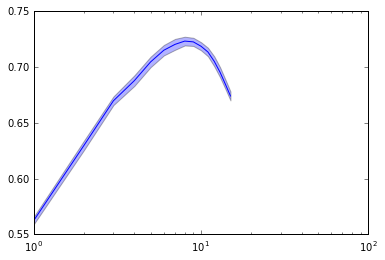

0.575105554961
AUC ROC 0.729409692838
             precision    recall  f1-score   support

          0       0.91      0.67      0.77     46428
          1       0.31      0.68      0.42      9919

avg / total       0.80      0.67      0.71     56347



In [100]:
# DecisionTreeClassifier
%time
model_1=tree.DecisionTreeClassifier(class_weight="balanced")
#?model_1
model_1.fit(train_data, train_labels)
model_1_pred=model_1.predict_proba(test_data)

def plot_scores_max_depth(optimizer):
    scores = [[item[0]['max_depth'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    

parameters_grid = {'max_depth' : range(1,16,1)}

opt_1=GridSearchCV(model_1, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=-1)
opt_1.fit(train_data, train_labels)

opt_1_pred = opt_1.predict(test_data)

print opt_1.best_estimator_
print opt_1.best_score_
print opt_1.best_params_
print opt_1.grid_scores_
plot_scores_max_depth(opt_1)

model_1_b=tree.DecisionTreeClassifier(class_weight="balanced", max_depth=opt_1.best_params_['max_depth'])
#model.get_params().keys()
model_1_b.fit(train_data, train_labels)
model_1_b_pred=model_1_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_1_pred[:,1])
res_1=metrics.roc_auc_score(test_labels, model_1_b_pred[:,1])
report_1 = metrics.classification_report(test_labels, model_1_b.predict(test_data))
print "AUC ROC", res_1
print report_1

In [28]:
# Gradient Boosting
%time
model_3=ensemble.GradientBoostingClassifier(random_state=3)
model_3.fit(train_data, train_labels)
model_3_pred=model_3.predict_proba(test_data)

parameters_grid = {'max_depth' : [2],
                  'n_estimators' : [800],
                  'learning_rate': np.linspace(0.1, 0.2, num = 11) }   
opt_3=GridSearchCV(model_3, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=7)
opt_3.fit(train_data, train_labels)
opt_3_pred = opt_3.predict(test_data)

print opt_3.best_estimator_
print opt_3.best_score_
print opt_3.best_params_
print opt_3.grid_scores_
plot_scores_max_depth(opt_3)
plot_scores_n_est(opt_3)
plot_scores_l_rate(opt_3)

model_3_b=ensemble.GradientBoostingClassifier(max_depth=opt_3.best_params_['max_depth'],
                                          n_estimators=opt_3.best_params_['n_estimators'],
                                        learning_rate=opt_3.best_params_['learning_rate'] )
#model.get_params().keys()
model_3_b.fit(train_data, train_labels)
model_3_b_pred=model_3_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_3_pred[:,1])
res_3=metrics.roc_auc_score(test_labels, model_3_b_pred[:,1])
report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print "AUC ROC", res_3
print report_3

Wall time: 0 ns
GradientBoostingClassifier(init=None, learning_rate=0.19, loss='deviance',
              max_depth=2, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=800,
              presort='auto', random_state=3, subsample=1.0, verbose=0,
              warm_start=False)
0.765632740156
{'n_estimators': 800, 'learning_rate': 0.19, 'max_depth': 2}
[mean: 0.76420, std: 0.00322, params: {'n_estimators': 800, 'learning_rate': 0.10000000000000001, 'max_depth': 2}, mean: 0.76478, std: 0.00308, params: {'n_estimators': 800, 'learning_rate': 0.11, 'max_depth': 2}, mean: 0.76465, std: 0.00335, params: {'n_estimators': 800, 'learning_rate': 0.12000000000000001, 'max_depth': 2}, mean: 0.76490, std: 0.00321, params: {'n_estimators': 800, 'learning_rate': 0.13, 'max_depth': 2}, mean: 0.76508, std: 0.00339, params: {'n_estimators': 800, 'learning_rate': 0.14000000000000001, 'max_depth': 2}, mean

NameError: name 'plot_scores_max_depth' is not defined

In [43]:
# SGDClassifier
model_5=linear_model.SGDClassifier(class_weight="balanced", n_jobs=7, shuffle=True, loss='log')
'penalty': 'l2', 'alpha': 0.0011000000000000001, 'n_iter': 140, 'eta0': 0.098888888888888887, 'loss': 'modified_huber'
#?model_5
model_5.fit(train_data, train_labels)
model_5_pred=model_5.predict_proba(test_data)
    
parameters_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron','squared_loss', 'huber','epsilon_insensitive','squared_epsilon_insensitive'],
                   'penalty' : ['l1', 'l2', 'elasticnet'],
                   'n_iter' : range(10,150,10),
                   'alpha' : np.linspace(0.0001, 0.0011, num = 10),
                   'eta0' : np.linspace(0.01, 0.11, num = 10)}

opt_5=GridSearchCV(model_5, param_grid=parameters_grid, cv=cv, scoring="roc_auc", n_jobs=7)
opt_5.fit(train_data, train_labels)
opt_5_pred = opt_5.predict(test_data)

print opt_5.best_estimator_
print opt_5.best_score_
print opt_5.best_params_
print opt_5.grid_scores_
#plot_scores_max_depth(opt_1)

model_5_b=linear_model.SGDClassifier(class_weight="balanced", n_jobs=7, shuffle=True, loss=opt_5.best_params_['loss'],
                                    penalty=opt_5.best_params_['penalty'], n_iter=opt_5.best_params_['n_iter'],
                                    alpha=opt_5.best_params_['alpha'], eta0=opt_5.best_params_['eta0'])
#model.get_params().keys()
model_5_b.fit(train_data, train_labels)
model_5_b_pred=model_5_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_5_pred[:,1])
res_5=metrics.roc_auc_score(test_labels, model_5_b_pred[:,1])
report_5 = metrics.classification_report(test_labels, model_5_b.predict(test_data))
print "AUC ROC", res_5
print report_5

SGDClassifier(alpha=0.0011000000000000001, average=False,
       class_weight='balanced', epsilon=0.1, eta0=0.098888888888888887,
       fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
       loss='modified_huber', n_iter=140, n_jobs=7, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, verbose=0,
       warm_start=False)
0.720363723722
{'penalty': 'l2', 'alpha': 0.0011000000000000001, 'n_iter': 140, 'eta0': 0.098888888888888887, 'loss': 'modified_huber'}
[mean: 0.70779, std: 0.00573, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 10, 'eta0': 0.01, 'loss': 'hinge'}, mean: 0.70578, std: 0.00630, params: {'penalty': 'l2', 'alpha': 0.0001, 'n_iter': 10, 'eta0': 0.01, 'loss': 'hinge'}, mean: 0.70363, std: 0.00405, params: {'penalty': 'elasticnet', 'alpha': 0.0001, 'n_iter': 10, 'eta0': 0.01, 'loss': 'hinge'}, mean: 0.71315, std: 0.00396, params: {'penalty': 'l1', 'alpha': 0.0001, 'n_iter': 20, 'eta0': 0.01, 'loss': 'hinge'}, mean: 0.71403, std: 0.00327, pa

LogisticRegression(C=9, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=7, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
0.720693541425
{'penalty': 'l1', 'C': 9, 'max_iter': 100}
[mean: 0.72069, std: 0.00429, params: {'penalty': 'l1', 'C': 6, 'max_iter': 90}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l2', 'C': 6, 'max_iter': 90}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l1', 'C': 6, 'max_iter': 95}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l2', 'C': 6, 'max_iter': 95}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l1', 'C': 6, 'max_iter': 100}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l2', 'C': 6, 'max_iter': 100}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l1', 'C': 6, 'max_iter': 105}, mean: 0.72069, std: 0.00429, params: {'penalty': 'l2', 'C': 6, 'max_iter': 105}, mean: 0.72069, std: 0.00429,

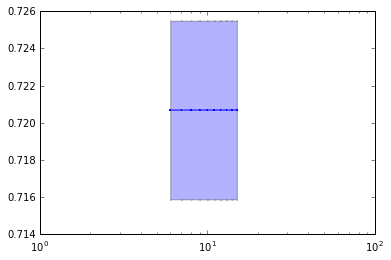

0.721721462933
AUC ROC 0.72172183751
             precision    recall  f1-score   support

          0       0.90      0.68      0.77     46428
          1       0.30      0.65      0.41      9919

avg / total       0.80      0.67      0.71     56347



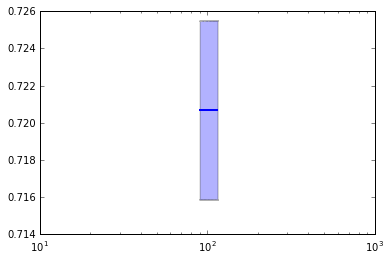

In [35]:
# Logistic Regression
model_4=linear_model.LogisticRegression(class_weight="balanced",n_jobs=7)
#?model_4
model_4.fit(train_data, train_labels)
model_4_pred=model_4.predict_proba(test_data)

parameters_grid = {'C': range(6,16,1),
                  'penalty': ['l1', 'l2'],
                  'max_iter':range(90,120,5)}

opt_4=GridSearchCV(model_4, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=7)
opt_4.fit(train_data, train_labels)

opt_4_pred = opt_4.predict(test_data)

print opt_4.best_estimator_
print opt_4.best_score_
print opt_4.best_params_
print opt_4.grid_scores_
plot_scores_C(opt_4)
plot_scores_max_iter(opt_4)

model_4_b=linear_model.LogisticRegression(class_weight="balanced", n_jobs=-1, C=opt_4.best_params_['C'],
                                          penalty=opt_4.best_params_['penalty'], max_iter=opt_4.best_params_['max_iter'] )
#model.get_params().keys()
model_4_b.fit(train_data, train_labels)
model_4_b_pred=model_4_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_4_pred[:,1])
res_4=metrics.roc_auc_score(test_labels, model_4_b_pred[:,1])
report_4 = metrics.classification_report(test_labels, model_4_b.predict(test_data))
print "AUC ROC", res_4
print report_4

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=97, n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
0.749211506361
{'n_estimators': 97, 'criterion': 'entropy', 'max_depth': 15}
[mean: 0.74155, std: 0.00213, params: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 10}, mean: 0.74178, std: 0.00327, params: {'n_estimators': 51, 'criterion': 'gini', 'max_depth': 10}, mean: 0.74092, std: 0.00170, params: {'n_estimators': 52, 'criterion': 'gini', 'max_depth': 10}, mean: 0.74263, std: 0.00097, params: {'n_estimators': 53, 'criterion': 'gini', 'max_depth': 10}, mean: 0.74038, std: 0.00294, params: {'n_estimators': 54, 'criterion': 'gini', 'max_depth': 10}, mean: 0.74051, std: 0.00198, params: {'n_estimators': 55, 'criterion': '

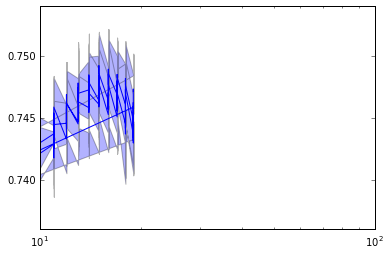

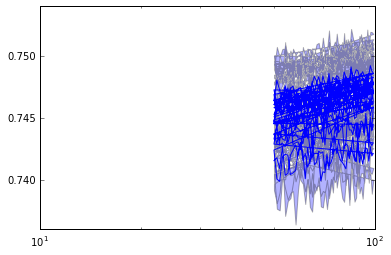

0.682383918901
AUC ROC 0.750044975311
             precision    recall  f1-score   support

          0       0.90      0.75      0.82     46428
          1       0.34      0.60      0.44      9919

avg / total       0.80      0.73      0.75     56347

Wall time: 0 ns


In [102]:
# Random Forest
model_2=ensemble.RandomForestClassifier(class_weight="balanced", n_jobs=-1, bootstrap=True)
#?model_1
model_2.fit(train_data, train_labels)
model_2_pred=model_2.predict_proba(test_data)

def plot_scores_n_est(optimizer):
    scores = [[item[0]['n_estimators'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    

parameters_grid = {'max_depth' : range(10,20,1),
                  'n_estimators' : range(50,100,1),
                  'criterion': ['gini', 'entropy'] }

opt_2=GridSearchCV(model_2, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=7)
opt_2.fit(train_data, train_labels)

opt_2_pred = opt_2.predict(test_data)

print opt_2.best_estimator_
print opt_2.best_score_
print opt_2.best_params_
print opt_2.grid_scores_
plot_scores_max_depth(opt_2)
plot_scores_n_est(opt_2)

model_2_b=ensemble.RandomForestClassifier(class_weight="balanced", n_jobs=-1, bootstrap=True,
                                          max_depth=opt_2.best_params_['max_depth'],
                                          n_estimators=opt_2.best_params_['n_estimators'],
                                        criterion=opt_2.best_params_['criterion'] )
#model.get_params().keys()
model_2_b.fit(train_data, train_labels)
model_2_b_pred=model_2_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_2_pred[:,1])
res_2=metrics.roc_auc_score(test_labels, model_2_b_pred[:,1])
report_2 = metrics.classification_report(test_labels, model_2_b.predict(test_data))
print "AUC ROC", res_2
print report_2
%time

In [56]:
# Gradient Boosting
%time
model_3=ensemble.GradientBoostingClassifier(random_state=3)
model_3.fit(train_data, train_labels)
model_3_pred=model_3.predict_proba(test_data)

def plot_scores_l_rate(optimizer):
    scores = [[item[0]['learning_rate'], 
               item[1], 
               (np.sum((item[2]-item[1])**2)/(item[2].size-1))**0.5] for item in optimizer.grid_scores_]
    scores = np.array(scores)
    plt.semilogx(scores[:,0], scores[:,1])
    plt.fill_between(scores[:,0], scores[:,1]-scores[:,2], 
                                  scores[:,1]+scores[:,2], alpha=0.3)
    plt.show()
    
parameters_grid = {'max_depth' : range(1,20,4),
                  'n_estimators' : range(1,101,9),
                  'learning_rate': np.linspace(0.01, 0.11, num = 10) }   
opt_3=GridSearchCV(model_3, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=7)
opt_3.fit(train_data, train_labels)
opt_3_pred = opt_3.predict(test_data)

print opt_3.best_estimator_
print opt_3.best_score_
print opt_3.best_params_
print opt_3.grid_scores_
plot_scores_max_depth(opt_3)
plot_scores_n_est(opt_3)
plot_scores_l_rate(opt_3)

model_3_b=ensemble.RandomForestClassifier(max_depth=opt_3.best_params_['max_depth'],
                                          n_estimators=opt_3.best_params_['n_estimators'],
                                        learning_rate=opt_3.best_params_['learning_rate'] )
#model.get_params().keys()
model_3_b.fit(train_data, train_labels)
model_3_b_pred=model_3_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_3_pred[:,1])
res_3=metrics.roc_auc_score(test_labels, model_3_b_pred[:,1])
report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print "AUC ROC", res_3
print report_3

Wall time: 0 ns
GradientBoostingClassifier(init=None, learning_rate=0.10000000000000001,
              loss='deviance', max_depth=5, max_features=None,
              max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=3, subsample=1.0, verbose=0,
              warm_start=False)
0.761169514413
{'n_estimators': 100, 'learning_rate': 0.10000000000000001, 'max_depth': 5}
[mean: 0.56125, std: 0.00180, params: {'n_estimators': 1, 'learning_rate': 0.01, 'max_depth': 1}, mean: 0.56125, std: 0.00180, params: {'n_estimators': 10, 'learning_rate': 0.01, 'max_depth': 1}, mean: 0.56125, std: 0.00180, params: {'n_estimators': 19, 'learning_rate': 0.01, 'max_depth': 1}, mean: 0.58614, std: 0.01410, params: {'n_estimators': 28, 'learning_rate': 0.01, 'max_depth': 1}, mean: 0.59325, std: 0.00065, params: {'n_estimators': 37, 'learning_rate': 0.01, 'max_depth': 1}, mean: 0.59325, std: 0.000

NameError: name 'plot_scores_max_depth' is not defined

In [58]:
model_3_b=ensemble.GradientBoostingClassifier(max_depth=opt_3.best_params_['max_depth'],
                                          n_estimators=opt_3.best_params_['n_estimators'],
                                        learning_rate=opt_3.best_params_['learning_rate'] )
#model.get_params().keys()
model_3_b.fit(train_data, train_labels)
model_3_b_pred=model_3_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_3_pred[:,1])
res_3=metrics.roc_auc_score(test_labels, model_3_b_pred[:,1])
report_3 = metrics.classification_report(test_labels, model_3_b.predict(test_data))
print "AUC ROC", res_3
print report_3

0.758512013997
AUC ROC 0.764777680386
             precision    recall  f1-score   support

          0       0.84      0.99      0.91     46428
          1       0.61      0.11      0.18      9919

avg / total       0.80      0.83      0.78     56347



In [69]:
a=np.array([[1,0.5,0.6,0.5,1,15.],[0.6,0.7,0.5,1,1,10.],[1,1,0.8,0.6,1,21.],[0.5,0.4,1,1,0.6,20.],[1,0.7,1,0.8,1,30.],
            [0.6,1,0.6,1,0.5,11.]])
b=np.array([0,1,1,0,1,0.])
c=np.array([[0.6,0.5,0.8,0.8,0.6,23.],[1,1,1,1,0.7,32.],[1,1,0.8,1,1,15.]])
d=np.array([1,0,1.])

In [70]:
print c

[[  0.6   0.5   0.8   0.8   0.6  23. ]
 [  1.    1.    1.    1.    0.7  32. ]
 [  1.    1.    0.8   1.    1.   15. ]]


In [47]:
ds_train = ClassificationDataSet(np.shape(train_data)[1], nb_classes=len(np.unique(train_labels)))
# Первый аргумент -- количество признаков np.shape(X)[1], второй аргумент -- количество меток классов len(np.unique(y_train)))
ds_train.setField('input', train_data) # Инициализация объектов
ds_train.setField('target', train_labels[:, np.newaxis]) # Инициализация ответов; np.newaxis создает вектор-столбец
ds_train._convertToOneOfMany( ) # Бинаризация вектора ответов
# Контрольная часть
ds_test = ClassificationDataSet(np.shape(train_data)[1], nb_classes=len(np.unique(train_labels)))
ds_test.setField('input', test_data)
ds_test.setField('target',test_labels[:, np.newaxis])
ds_test._convertToOneOfMany( )

HIDDEN_NEURONS_NUM=250

In [48]:
# Построение сети прямого распространения (Feedforward network)
net = buildNetwork(ds_train.indim, HIDDEN_NEURONS_NUM, ds_train.outdim, outclass=SoftmaxLayer)
# ds.indim -- количество нейронов входного слоя, равне количеству признаков
# ds.outdim -- количество нейронов выходного слоя, равное количеству меток классов
# SoftmaxLayer -- функция активации, пригодная для решения задачи многоклассовой классификации

init_params = np.random.random((len(net.params))) # Инициализируем веса сети для получения воспроизводимого результата
net._setParameters(init_params)

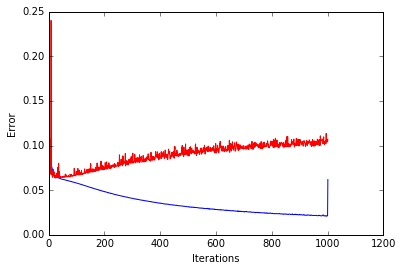

In [49]:
trainer = BackpropTrainer(net, dataset=ds_train) # Инициализируем модуль оптимизации
err_train, err_val = trainer.trainUntilConvergence(maxEpochs=1000)
line_train = plt.plot(err_train, 'b', err_val, 'r') # Построение графика
xlab = plt.xlabel('Iterations')
ylab = plt.ylabel('Error')

In [35]:
print np.unique(train_labels)
print len(np.unique(train_labels))
print train_labels[0:15]
print train_labels[:, np.newaxis][0:15]
print err_train
print err_val

[ 0.  1.]
2
[ 0.  0.  1.  0.  1.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.]
[[ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 1.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]
 [ 0.]]
[0.41170643014487346, 0.41170643014487346, 0.41170643014487346, 0.41170643014487346]
[0.41283216783216781, 0.41283216783216781, 0.41283216783216781, 0.41283216783216781]


In [50]:
res_train = net.activateOnDataset(ds_train).argmax(axis=1)
res_test = net.activateOnDataset(ds_test).argmax(axis=1)

In [51]:
print 'Error on train: ', percentError(res_train, ds_train['target'].argmax(axis=1)), '%' # Подсчет ошибки
print 'Error on test: ', percentError(res_test, ds_test['target'].argmax(axis=1)), '%' # Подсчет ошибки

Error on train:  16.9197283193 %
Error on test:  17.2484781798 %


In [30]:
#print np.unique(y_train)
#print ds_train.outdim
print np.unique(res_test)
print ds_train.data['class'][0]
print res_train
print ds_train['target']

[0 1]
[ 0.]
[0 0 0 ..., 0 0 0]
[[1 0]
 [1 0]
 [0 1]
 ..., 
 [1 0]
 [1 0]
 [1 0]]


In [52]:
res_6=metrics.roc_auc_score(train_labels, res_train)
report_6 = metrics.classification_report(train_labels, res_train)
print "AUC ROC train", res_6
print report_6
res_66=metrics.roc_auc_score(test_labels, res_test)
report_66 = metrics.classification_report(test_labels, res_test)
print "AUC ROC test", res_66
print report_66

AUC ROC train 0.554479578198
             precision    recall  f1-score   support

        0.0       0.84      0.98      0.91     94262
        1.0       0.59      0.13      0.21     20137

avg / total       0.80      0.83      0.78    114399

AUC ROC test 0.548848548664
             precision    recall  f1-score   support

        0.0       0.84      0.98      0.90     46428
        1.0       0.55      0.12      0.20      9919

avg / total       0.79      0.83      0.78     56347



In [51]:
# KNN
model_7=neighbors.KNeighborsClassifier(n_jobs=7, weights='uniform', p=1, algorithm='auto', n_neighbors=60)
#?model_7
model_7.fit(train_data, train_labels)
model_7_pred=model_7.predict_proba(test_data)
print metrics.roc_auc_score(test_labels, model_7_pred[:,1])

parameters_grid = {'n_neighbors': range(65,101,5)}   
opt_7=GridSearchCV(model_7, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=7)
opt_7.fit(train_data, train_labels)
opt_7_pred = opt_7.predict(test_data)

print opt_7.best_estimator_
print opt_7.best_score_
print opt_7.best_params_
print opt_7.grid_scores_
#plot_scores_n_neighbors(opt_7)
#plot_scores_n_est(opt_3)
#plot_scores_l_rate(opt_3)

model_7_b=neighbors.KNeighborsClassifier(n_neighbors=opt_7.best_params_['n_neighbors'],n_jobs=7, weights='uniform', p=1,
                                         algorithm='auto')
#model.get_params().keys()
model_7_b.fit(train_data, train_labels)
model_7_b_pred=model_7_b.predict_proba(test_data)

#print metrics.roc_auc_score(test_labels, model_7_pred[:,1])
res_7=metrics.roc_auc_score(test_labels, model_7_b_pred[:,1])
report_7 = metrics.classification_report(test_labels, model_7_b.predict(test_data))
print "AUC ROC", res_7
print report_7

0.726397412129
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=7, n_neighbors=85, p=1,
           weights='uniform')
0.722780210927
{'n_neighbors': 85}
[mean: 0.71936, std: 0.00119, params: {'n_neighbors': 65}, mean: 0.72118, std: 0.00109, params: {'n_neighbors': 70}, mean: 0.72185, std: 0.00112, params: {'n_neighbors': 75}, mean: 0.72237, std: 0.00136, params: {'n_neighbors': 80}, mean: 0.72278, std: 0.00129, params: {'n_neighbors': 85}, mean: 0.72266, std: 0.00102, params: {'n_neighbors': 90}, mean: 0.72273, std: 0.00113, params: {'n_neighbors': 95}, mean: 0.72269, std: 0.00143, params: {'n_neighbors': 100}]
AUC ROC 0.730576041268
             precision    recall  f1-score   support

          0       0.83      0.99      0.91     46428
          1       0.65      0.06      0.10      9919

avg / total       0.80      0.83      0.76     56347



In [29]:
range(65,101,5)

[65, 70, 75, 80, 85, 90, 95, 100]

In [ ]:
train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X_train,
                                                                                     y_train, test_size = 0.33,
                                                                                     stratify=y_train)
cv = cross_validation.StratifiedShuffleSplit(train_labels, n_iter = 5, test_size = 0.2, random_state = 0)

In [55]:
def plot_scores(d_scores):
    n_components = np.arange(1,d_scores.size+1)
    plt.plot(n_components, d_scores, 'b', label='PCA scores')
    plt.xlim(n_components[0], n_components[-1])
    plt.xlabel('n components')
    plt.ylabel('cv scores')
    plt.legend(loc='lower right')
    plt.show()

In [60]:
for i in range(X_train.shape[1]):
    print i+1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160


In [65]:
d_scores=[]
for i in range(X_train.shape[1]):
    n=i+1
    model=PCA(n_components=n)
    model.fit(X_train)
    scores = cross_validation.cross_val_score(model, X_train)
    d_scores.append(np.mean(scores))
    print i+1, model.score(X_train), scores, np.mean(scores)   

print d_scores

0 8.13052383649 [ 7.34544756  8.43233161  8.54712961] 8.10830292646
1 19.985357215 [ 19.20978046  20.25840831  20.42324197] 19.9638102454
2 30.7989233374 [ 30.10242778  31.14533825  31.06053472] 30.7694335841
3 41.3295359967 [ 40.5977299   41.63823618  41.65367141] 41.2965458316
4 49.7299495949 [ 49.2492177   49.87658951  49.93698838] 49.6875985289
5 56.556301256 [ 56.27653707  56.62455909  56.68749344] 56.5295298653
6 62.2837847877 [ 62.0207205   62.32759824  62.41973325] 62.2560173284
7 68.0962802568 [ 67.90917307  68.11011552  68.21740958] 68.0788993889
8 72.4339797242 [ 72.26567991  72.42743525  72.54926385] 72.4141263392
9 77.0050217432 [ 76.804422    77.04391126  77.10660123] 76.9849781601
10 81.2239322315 [ 81.01786748  81.28152015  81.30676312] 81.2020502473
11 85.5491451813 [ 85.33325585  85.61612285  85.63056798] 85.5266488948
12 89.4385302434 [ 89.22247395  89.4921328   89.52684328] 89.4138166788
13 93.1914700285 [ 92.93811776  93.27653247  93.27925365] 93.1646346289
14 96.7

ValueError: array must not contain infs or NaNs

<type 'numpy.ndarray'>


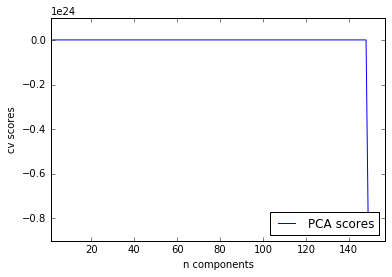

In [66]:
q=np.array(d_scores)
print type(q)
plot_scores(q)

In [64]:
for i in X_train[0]:
    print type(i)

<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'numpy.float64'>
<type 'nump

In [62]:
etc=ensemble.ExtraTreesClassifier(class_weight="balanced", n_estimators=100, bootstrap=True, n_jobs=7)
etc.fit(X_train, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=7,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [67]:
a=np.int0(etc.feature_importances_*1000000)
print np.mean(a)
print np.sort(a)
print np.sort(etc.feature_importances_)[0]
print np.sort(etc.feature_importances_)

6249.525
[    0     0     1     3     5     5     6     7    13    13    26    61
   138   138   139   193   204   206   237   274   336   364   472   495
   509   566   571   571   616   659   686   695   721   763   784   911
   912   956  1158  1188  1254  1264  1272  1274  1412  1420  1464  1570
  1620  1660  1700  1707  1717  1798  1807  1811  1848  1876  1895  1913
  1954  1965  2018  2021  2082  2136  2169  2187  2254  2260  2331  2340
  2348  2387  2429  2436  2458  2474  2601  2702  2722  2772  2862  2925
  2975  3002  3051  3097  3106  3132  3177  3177  3182  3214  3435  3439
  3453  3511  3714  3740  3799  3868  3944  3959  4020  4094  4393  4401
  4617  4750  4793  5028  5074  5099  5121  5212  5226  5258  5805  5859
  5906  5920  6185  6288  6344  6427  6800  6886  7029  7364  7596  7667
  7881  7915  8097  8975  9025  9159  9231  9276  9614  9923 10191 10279
 10363 10500 10504 11029 11791 11869 12564 12583 13782 15097 32751 62074
 77185 82414 91153 92845]
1.3664461296e-07

In [80]:
# DecisionTreeClassifier
res_1_f_opt=[]
model_1_b=tree.DecisionTreeClassifier(class_weight="balanced", max_depth=8)

for i in range(len(etc.feature_importances_)):
    X_train_feat=etc.transform(X_train, np.sort(etc.feature_importances_)[i])    
    train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X_train_feat, y_train,
                                                                                         test_size = 0.33, stratify=y_train)
    model_1_b.fit(train_data, train_labels)
    model_1_b_pred=model_1_b.predict_proba(test_data)

    res_1_f=metrics.roc_auc_score(test_labels, model_1_b_pred[:,1])
    res_1_f_opt.append([res_1_f, train_data.shape[1]])
    
    #print train_data.shape[1], res_1_f, max(res_1_f_opt)
print max(res_1_f_opt)

C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\__init__.py:93: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed 

[0.73452551824686474, 126L]


In [84]:
# DecisionTreeClassifier
res_1_f_opt=[]
model_1_b=tree.DecisionTreeClassifier(class_weight="balanced", max_depth=8)

for i in range(len(etc.feature_importances_)):
    #X_train_feat=etc.transform(X_train, np.sort(etc.feature_importances_)[i])
    SFM(etc, threshold=np.sort(etc.feature_importances_)[i])
    X_train_feat=q.fit_transform(X_train, y_train)
    
    print X_train_feat.shape
    #train_data, test_data, train_labels, test_labels = cross_validation.train_test_split(X_train_feat, y_train,
    #                                                                                     test_size = 0.33, stratify=y_train)
    #model_1_b.fit(train_data, train_labels)
    #model_1_b_pred=model_1_b.predict_proba(test_data)

    #res_1_f=metrics.roc_auc_score(test_labels, model_1_b_pred[:,1])
    #res_1_f_opt.append([res_1_f, train_data.shape[1]])
    
    #print train_data.shape[1], res_1_f, max(res_1_f_opt)
#print max(res_1_f_opt)

(170746L, 159L)
(170746L, 159L)
(170746L, 158L)
(170746L, 157L)
(170746L, 154L)
(170746L, 153L)
(170746L, 155L)
(170746L, 154L)
(170746L, 152L)
(170746L, 152L)
(170746L, 149L)
(170746L, 148L)
(170746L, 148L)
(170746L, 146L)
(170746L, 145L)
(170746L, 145L)
(170746L, 143L)
(170746L, 143L)
(170746L, 142L)
(170746L, 140L)
(170746L, 140L)
(170746L, 139L)
(170746L, 138L)
(170746L, 137L)
(170746L, 136L)
(170746L, 134L)
(170746L, 133L)
(170746L, 134L)
(170746L, 131L)
(170746L, 130L)
(170746L, 129L)
(170746L, 129L)
(170746L, 127L)
(170746L, 127L)
(170746L, 127L)
(170746L, 123L)
(170746L, 123L)
(170746L, 122L)
(170746L, 122L)
(170746L, 120L)
(170746L, 117L)
(170746L, 117L)
(170746L, 119L)
(170746L, 118L)
(170746L, 115L)
(170746L, 115L)
(170746L, 113L)
(170746L, 111L)
(170746L, 112L)
(170746L, 111L)
(170746L, 110L)
(170746L, 109L)
(170746L, 108L)
(170746L, 106L)
(170746L, 106L)


KeyboardInterrupt: 

In [55]:
etc=ensemble.ExtraTreesClassifier(class_weight="balanced", n_estimators=100, bootstrap=True, n_jobs=7)
etc.fit(q, y_train)

ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
           criterion='gini', max_depth=None, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=7,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [56]:
etc.feature_importances_

array([ 0.00885589,  0.01217485,  0.01015968,  0.01140746,  0.01054802,
        0.00986981,  0.01272996,  0.01236409,  0.00728161,  0.00765063,
        0.01429571,  0.00926619,  0.00837469,  0.0071776 ,  0.01120534,
        0.01017562,  0.01393148,  0.00774677,  0.01024512,  0.01025737,
        0.00906655,  0.00732613,  0.00868167,  0.00835252,  0.01102307,
        0.01080793,  0.01284006,  0.01898542,  0.03914469,  0.01121536,
        0.13544527,  0.15239636,  0.0883207 ,  0.15086883,  0.12980755])

In [ ]:
# Author: Manoj Kumar <mks542@nyu.edu>
# License: BSD 3 clause

print(__doc__)

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV

# Load the boston dataset.
boston = load_boston()
X, y = boston['data'], boston['target']

# We use the base estimator LassoCV since the L1 norm promotes sparsity of features.
clf = LassoCV()

# Set a minimum threshold of 0.25
sfm = SelectFromModel(clf, threshold=0.25)
sfm.fit(X, y)
n_features = sfm.transform(X).shape[1]

# Reset the threshold till the number of features equals two.
# Note that the attribute can be set directly instead of repeatedly
# fitting the metatransformer.
while n_features > 2:
    sfm.threshold += 0.1
    X_transform = sfm.transform(X)
    n_features = X_transform.shape[1]

# Plot the selected two features from X.
plt.title(
    "Features selected from Boston using SelectFromModel with "
    "threshold %0.3f." % sfm.threshold)
feature1 = X_transform[:, 0]
feature2 = X_transform[:, 1]
plt.plot(feature1, feature2, 'r.')
plt.xlabel("Feature number 1")
plt.ylabel("Feature number 2")
plt.ylim([np.min(feature2), np.max(feature2)])
plt.show()

In [36]:
### ExtraTreesClassifier
model_8=ensemble.ExtraTreesClassifier(bootstrap=True, class_weight='balanced', n_jobs=7)
#?model_f
model_8.fit(train_data, train_labels)
model_8_pred=model_8.predict_proba(test_data)

parameters_grid = {'max_depth' : range(15,41,1),
                  'n_estimators' : range(50,160,10),
                  'criterion': ['gini', 'entropy'] }

opt_8=GridSearchCV(model_8, param_grid=parameters_grid, cv=cv, scoring='roc_auc', n_jobs=7)
opt_8.fit(train_data, train_labels)

opt_8_pred = opt_8.predict(test_data)

print opt_8.best_estimator_
print opt_8.best_score_
print opt_8.best_params_
print opt_8.grid_scores_
#plot_scores_max_depth(opt_2)
#plot_scores_n_est(opt_2)

model_8_b=ensemble.ExtraTreesClassifier(class_weight="balanced", n_jobs=7, bootstrap=True,
                                          max_depth=opt_8.best_params_['max_depth'],
                                          n_estimators=opt_8.best_params_['n_estimators'],
                                        criterion=opt_8.best_params_['criterion'] )
#model.get_params().keys()
model_8_b.fit(train_data, train_labels)
model_8_b_pred=model_8_b.predict_proba(test_data)

print metrics.roc_auc_score(test_labels, model_8_pred[:,1])
res_8=metrics.roc_auc_score(test_labels, model_8_b_pred[:,1])
#report_2 = metrics.classification_report(test_labels, model_2_b.predict(test_data))
print "AUC ROC", res_8
#print report_2

ExtraTreesClassifier(bootstrap=True, class_weight='balanced',
           criterion='entropy', max_depth=19, max_features='auto',
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=120, n_jobs=7,
           oob_score=False, random_state=None, verbose=0, warm_start=False)
0.717643007245
{'n_estimators': 120, 'criterion': 'entropy', 'max_depth': 19}
[mean: 0.71403, std: 0.00318, params: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 15}, mean: 0.71410, std: 0.00157, params: {'n_estimators': 60, 'criterion': 'gini', 'max_depth': 15}, mean: 0.71565, std: 0.00260, params: {'n_estimators': 70, 'criterion': 'gini', 'max_depth': 15}, mean: 0.71401, std: 0.00135, params: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 15}, mean: 0.71377, std: 0.00332, params: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 15}, mean: 0.71580, std: 0.00265, params: {'n_estimators': 100, 'criterion': 'gini', 'max_dept

In [35]:
range(15,41,1)

[15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40]

In [32]:
max(res_3_f_opt)

[0.77188834387521432, 157L]

In [40]:
res_3_f_opt

[[0.76824080644675308, 160L],
 [0.76628865387132106, 159L],
 [0.76745043137515878, 158L],
 [0.77188834387521432, 157L],
 [0.76447958432285745, 156L],
 [0.76522182569308506, 155L],
 [0.76674880502084974, 154L],
 [0.76930547184933373, 153L],
 [0.76579124369962392, 152L],
 [0.76438169483838303, 151L],
 [0.76686740156219979, 150L],
 [0.76509103205248286, 149L],
 [0.76686551673361669, 148L],
 [0.76360759595647121, 147L],
 [0.76943489421199818, 146L],
 [0.76720905280041529, 145L],
 [0.76553719464702075, 144L],
 [0.76746600943996857, 143L],
 [0.76635277604372098, 142L],
 [0.76323989478035636, 141L],
 [0.76596361105639743, 140L],
 [0.76566627500449858, 139L],
 [0.76680058569180765, 138L],
 [0.76696459183607091, 137L],
 [0.76987433396172811, 136L],
 [0.76652532254606842, 135L],
 [0.76463437478450968, 134L],
 [0.76934828547002221, 133L],
 [0.76717274270692304, 132L],
 [0.76620273131117977, 131L],
 [0.76848975147909737, 130L],
 [0.76825247479512959, 129L],
 [0.76377291909213496, 128L],
 [0.763574

In [74]:
q=0
for i in data_cat:
    q=q+len(data_cat[i].unique())
    print i, len(data_cat[i].unique()), q

gender 2 2
marital_status 5 7
job_position 18 25
tariff_id 32 57
education 5 62
living_region 84 146
credit_count 6 152
overdue_credit_count 3 155


gender 2 2
marital_status 5 7
job_position 18 25
tariff_id 30 55
education 5 60
living_region 84 144
credit_count 6 150
overdue_credit_count 3 153